In [1]:
import os; graphs_save_folder = "./t5llmNewGraphs/"; os.makedirs(graphs_save_folder, exist_ok=True)

In [2]:
# Function to convert true actions
def convert_to_classes(action):
    if action < 0.5:
        return 0
    elif action < 1.5:
        return 1
    else:
        return 2

In [3]:
# import os
# import json
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Directory containing the log files (update this path as needed)
# log_dir = r'C:\Users\User\Documents\GitHub\L4S-LLM\Log Viz'

# # Initialize lists to store the data
# episode_indexes = []
# mean_losses = []
# mean_accuracies = []
# state_features = {f"state_{i}": [] for i in range(9)}  # To store state features 0-8

# # Read the specific log file
# log_files = ["custom_logs_epoch_testseq_1.json"]  # Only using this specific log file


# with open(os.path.join(log_dir, log_files[0]), 'r') as file:
#     data = json.load(file)

#     losses = [step['test_loss'] for step in data['steps']]
#     actions_preds = [step['actions_pred'] for step in data['steps']]
#     actions = [step['actions'] for step in data['steps']]

#     # Calculate mean and median losses
#     mean_loss = np.mean(losses)
#     mean_losses.append(mean_loss)

#     # Calculate accuracy
#     accuracies = []
#     for preds, true_actions in zip(actions_preds, actions):
#         preds_array = np.array(preds)
#         true_actions_array = np.array(true_actions)
#         # Assume convert_to_classes is a function for converting actions to classes
#         true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())
#         preds_indices = preds_array.argmax(axis=1).flatten()
#         accuracy = (preds_indices == true_actions_classes).mean()
#         accuracies.append(accuracy)

#     mean_accuracy = np.mean(accuracies) if accuracies else None
#     mean_accuracies.append(mean_accuracy)

#     # Extract state features 0-8 from each step in the data
#     for step in data['steps']:
#         episode_indexes.append(len(episode_indexes))  # Use step index as the episode index
#         for i in range(8):  # Extract state features 0-8
#             state_feature_value = step['states'][0][0][i]
#             print(str(i),end=",")
#             print(state_feature_value)
#             state_features[f"state_{i}"].append(state_feature_value)
#         print("*"*50)

#     print(len(episode_indexes), len(losses), len(accuracies), len(state_features["state_0"]))

#     # Convert data into DataFrame for easier plotting
#     df = pd.DataFrame({
#         'Episode Index': episode_indexes,
#         'Mean Loss': losses,
#         'Mean Accuracy': accuracies,
#     })

# # Plotting
# plt.figure(figsize=(14, 12))


# plt.plot(df['Episode Index'], df['Mean Loss'], marker='o', label=label_name+'Mean Loss', color='blue')
# plt.title('Mean Loss over Episode Index')
# plt.xlabel('Episode Index')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid()
# plt.show()


# plt.plot(df['Episode Index'], df['Mean Accuracy'], marker='o', label=label_name+'Mean Accuracy', color='green')
# plt.title('Mean Accuracy over Episode Index')
# plt.xlabel('Episode Index')
# plt.ylabel('Accuracy')
# plt.ylim(0, 1)  # Accuracy is between 0 and 1
# plt.legend()
# plt.grid()
# plt.show()

# # Plot State Features (0-8) over Episode Index
# for i in range(9):
#     print("_*_*"*50)
#     print("state_index",i)
#     print("type",type(state_features[f"state_{i}"]))
#     print("len",len(state_features[f"state_{i}"]))
#     print("[0][0]",state_features[f"state_{i}"][0])
#     plt.plot(df['Episode Index'], state_features[f"state_{i}"], marker='_', label=f'State {i}')
#     plt.title(f'State {i} over Episode Index')
#     plt.xlabel('Episode Index')
#     plt.ylabel(f'State {i} Value')
#     plt.legend()
#     plt.grid()
#     plt.show()

# plt.tight_layout()


In [4]:
label_name="Testing "

In [5]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the log files (update this path as needed)
log_dir = r'C:\Users\User\Documents\GitHub\L4S-LLM\Log Viz\t5llm_test1'
# Initialize lists to store the data
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []
mean_cpu_usage = []
mean_ram_usage = []
mean_gpu_usage = []
mean_vram_usage = []
mean_disk_read_speed = []
mean_disk_write_speed = []

# Read all the custom_logs_epoch_test_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_test_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract relevant metrics
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step['test_loss'] for step in data['steps']][:200]
        actions_preds = [step['actions_pred'] for step in data['steps']][:200]
        actions = [step['actions'] for step in data['steps']][:200]
        
        # Calculate mean and median losses
        mean_loss = np.mean(losses)
        median_loss = np.median(losses)
        
        mean_losses.append(mean_loss)
        median_losses.append(median_loss)

        # Calculate accuracy
        accuracies = []
        for preds, true_actions in zip(actions_preds, actions):
            preds_array = np.array(preds)
            true_actions_array = np.array(true_actions)
            true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())
            preds_indices = preds_array.argmax(axis=1).flatten()
            accuracy = (preds_indices == true_actions_classes).mean()
            accuracies.append(accuracy)

        mean_accuracy = np.mean(accuracies) if accuracies else None
        mean_accuracies.append(mean_accuracy)

        # Gather resource usage metrics
        cpu_usages = [step['CPU Usage'] for step in data['steps']][:200]
        ram_usages = [step['RAM Usage'] for step in data['steps']][:200]
        gpu_usages = [step['GPU Usage'] for step in data['steps']][:200]
        vram_usages = [step['VRAM Usage'] for step in data['steps']][:200]
        disk_read_speeds = [step['Disk Read Speed (MB/s)'] for step in data['steps']][:200]
        disk_write_speeds = [step['Disk Write Speed (MB/s)'] for step in data['steps']][:200]

        # Calculate mean resource usages
        mean_cpu_usage.append(np.mean(cpu_usages))
        mean_ram_usage.append(np.mean(ram_usages))
        mean_gpu_usage.append(np.mean(gpu_usages))
        mean_vram_usage.append(np.mean(vram_usages))
        mean_disk_read_speed.append(np.mean(disk_read_speeds))
        mean_disk_write_speed.append(np.mean(disk_write_speeds))

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies,
    'Mean CPU Usage': mean_cpu_usage,
    'Mean RAM Usage': mean_ram_usage,
    'Mean GPU Usage': mean_gpu_usage,
    'Mean VRAM Usage': mean_vram_usage,
    'Mean Disk Read Speed': mean_disk_read_speed,
    'Mean Disk Write Speed': mean_disk_write_speed,
})

# Plotting
plt.figure(figsize=(14, 12))

# Plot Mean Loss and Mean Accuracy
plt.subplot(3, 2, 1)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label=label_name+'Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label=label_name+'Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()


plt.subplot(3, 2, 2)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label=label_name+'Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend()
plt.grid()


# Plot Mean Resource Usage
plt.subplot(3, 2, 3)
plt.plot(df['Epoch'], df['Mean CPU Usage'], marker='o', label=label_name+'Mean CPU Usage', color='blue')
plt.title('Mean CPU Usage over Epochs')
plt.xlabel('Epoch')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(df['Epoch'], df['Mean RAM Usage'], marker='o', label=label_name+'Mean RAM Usage', color='orange')
plt.title('Mean RAM Usage over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RAM Usage (%)')
plt.legend()
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(df['Epoch'], df['Mean GPU Usage'], marker='o', label=label_name+'Mean GPU Usage', color='green')
plt.title('Mean GPU Usage over Epochs')
plt.xlabel('Epoch')
plt.ylabel('GPU Usage (%)')
plt.legend()
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(df['Epoch'], df['Mean Disk Read Speed'], marker='o', label=label_name+'Mean Disk Read Speed', color='purple')
plt.plot(df['Epoch'], df['Mean Disk Write Speed'], marker='x', label=label_name+'Mean Disk Write Speed', color='red')
plt.title('Mean Disk Read and Write Speed over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\User\\Documents\\GitHub\\L4S-LLM\\Log Viz\\t5llm_test1'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


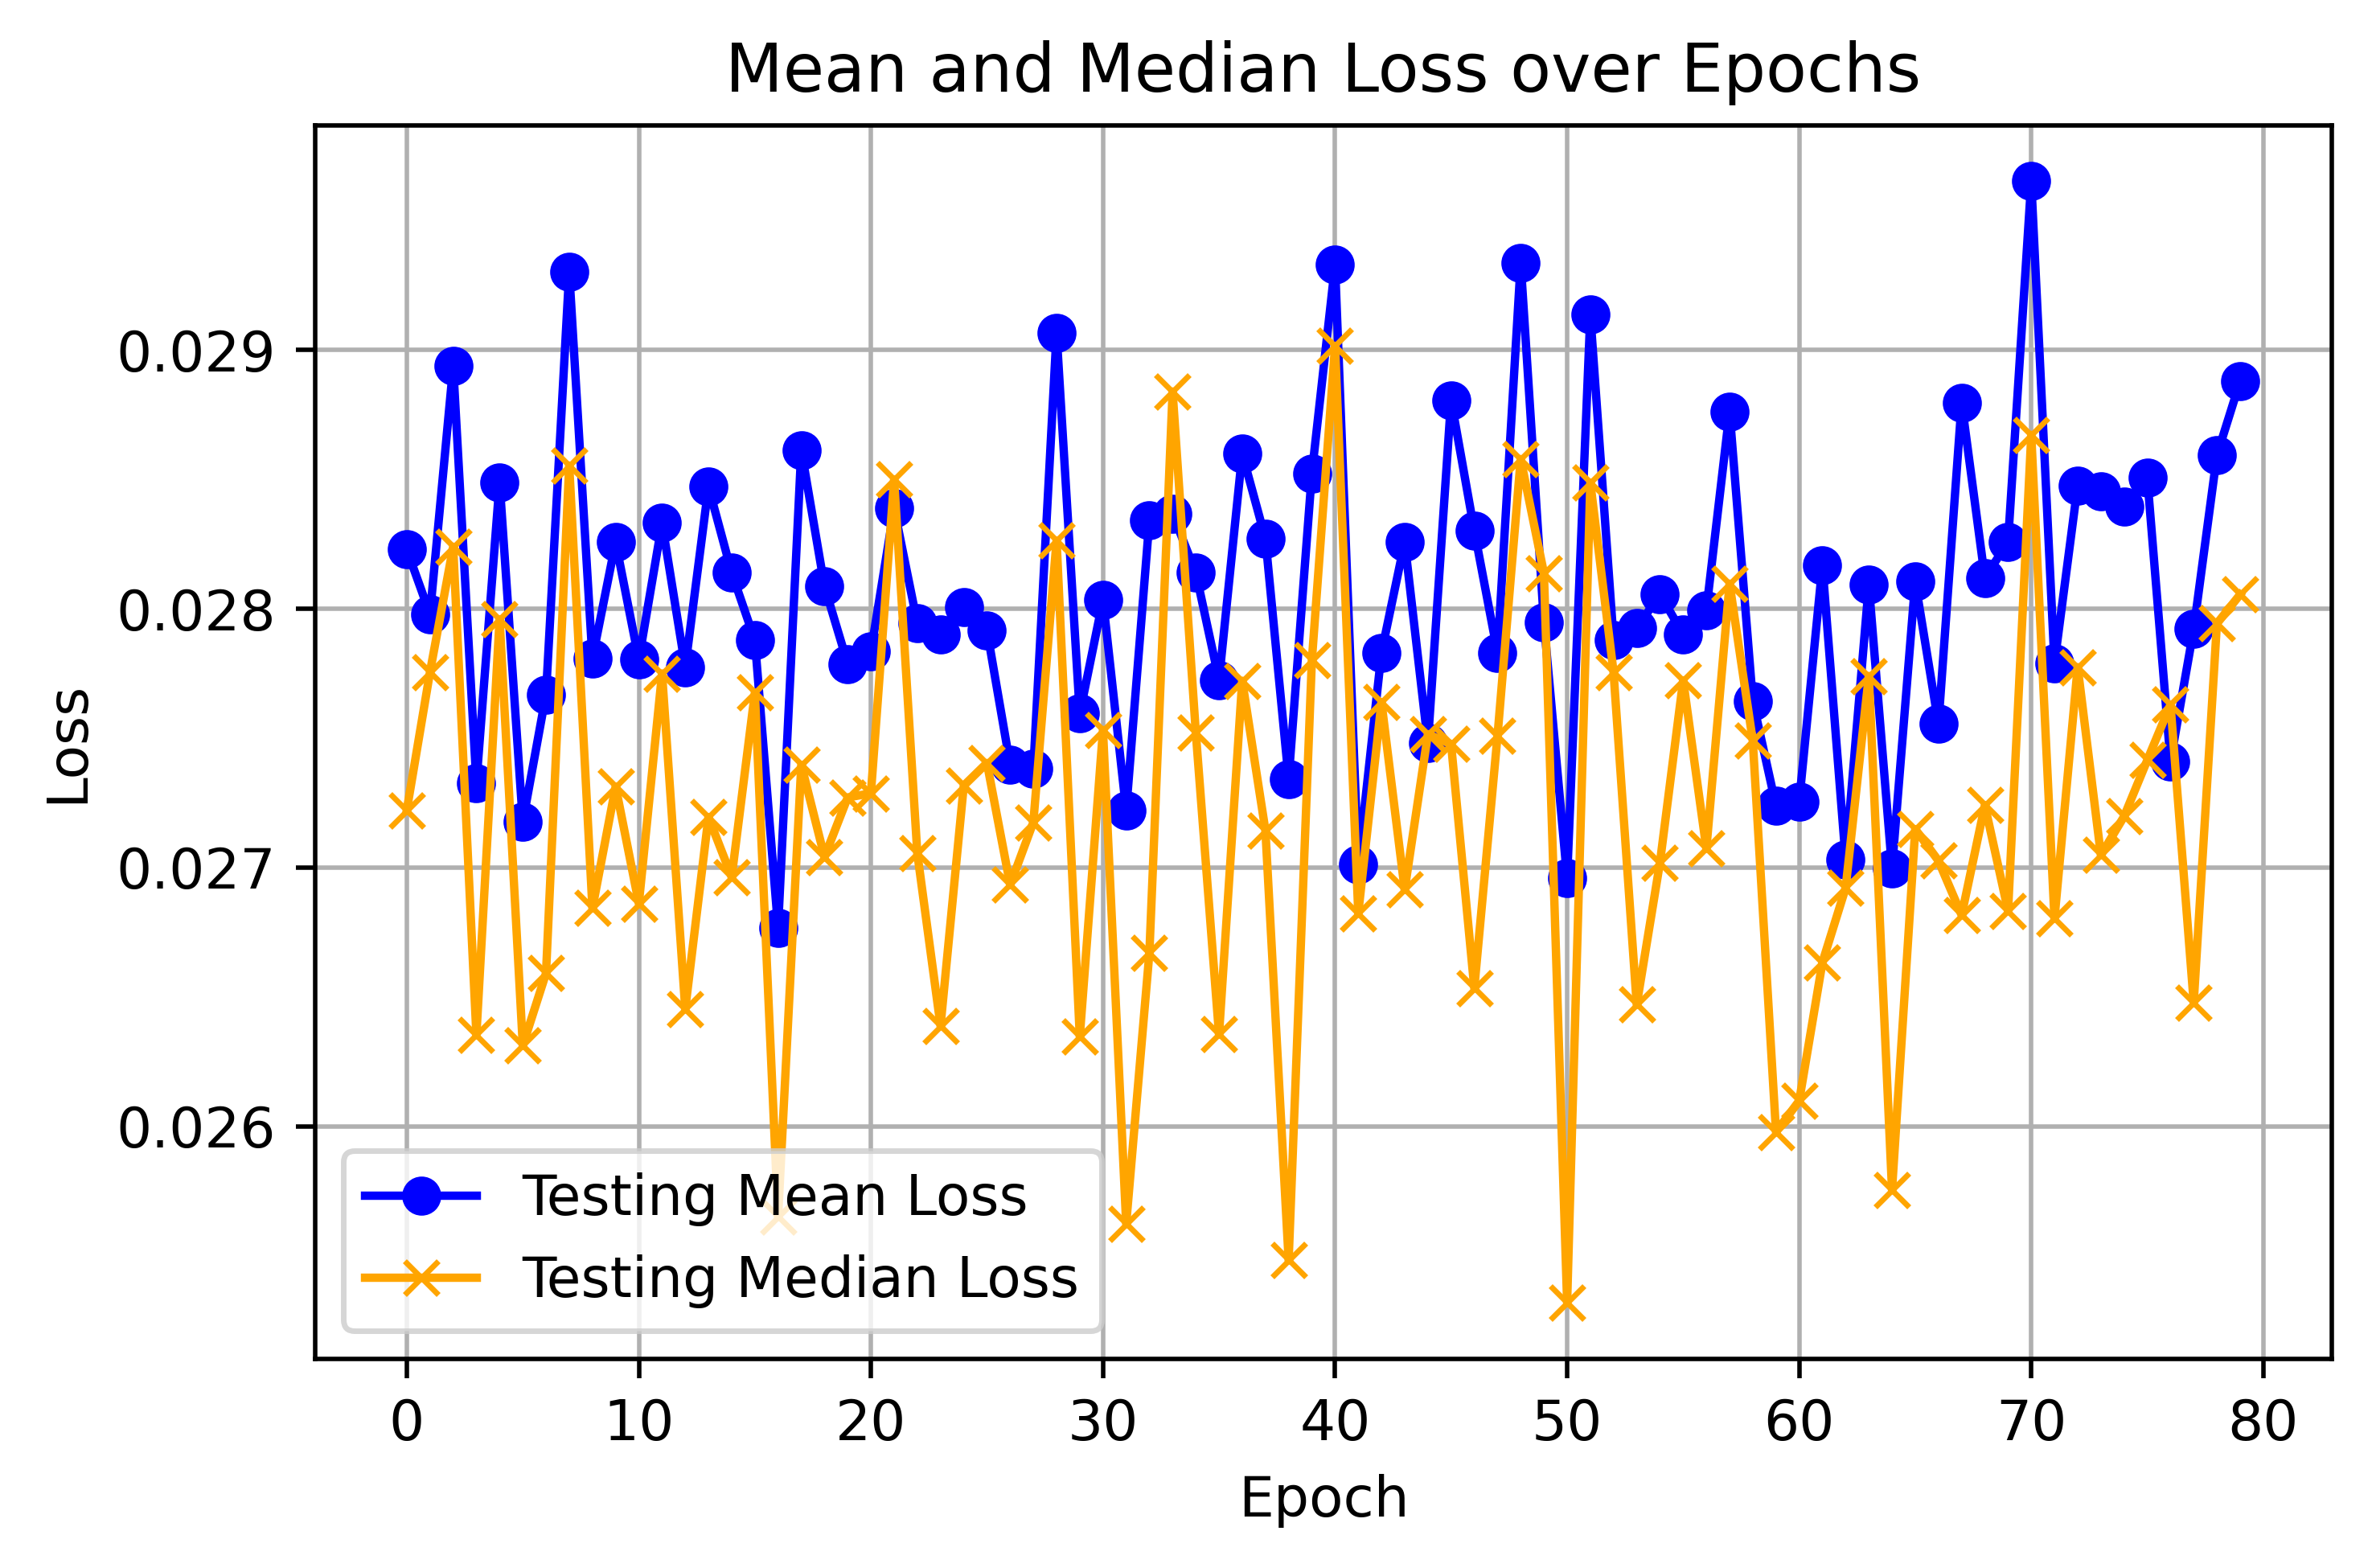

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


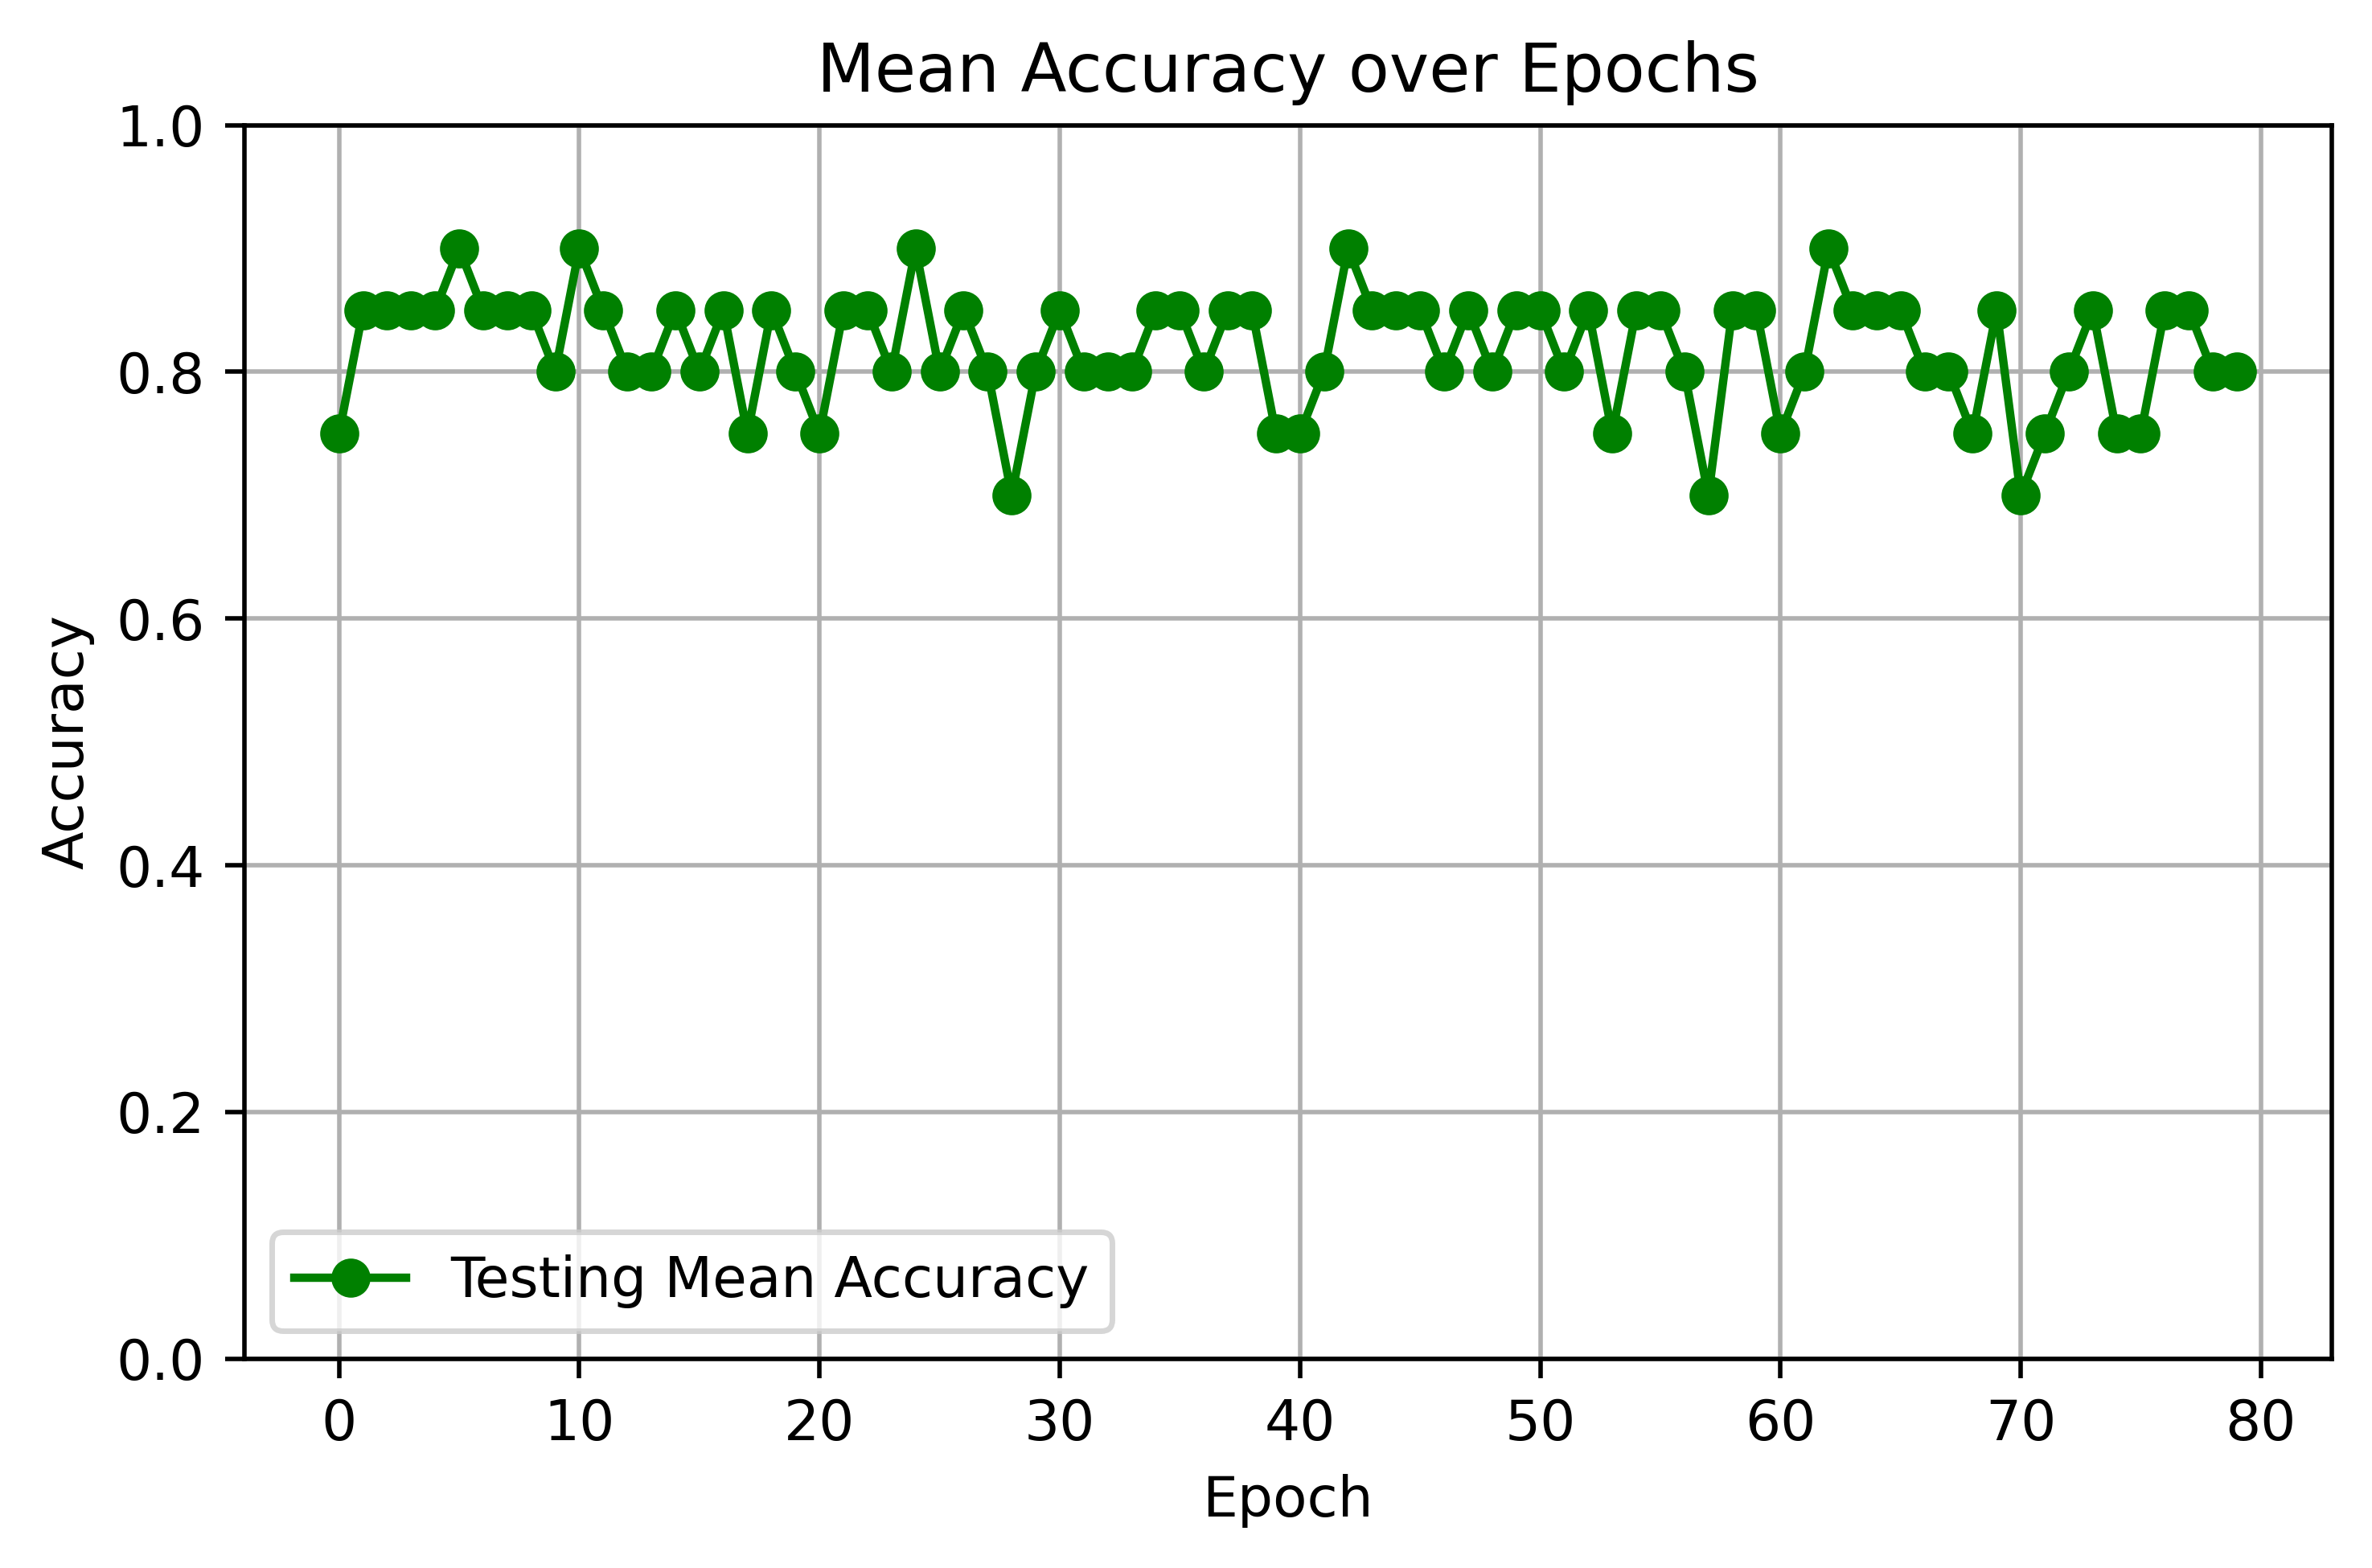

In [30]:
# Plot Mean Loss and Mean Accuracy
plt.figure(figsize=(6, 4), dpi=500)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label=label_name+'Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label=label_name+'Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Show the second plot
plt.tight_layout()

plt.savefig(graphs_save_folder+"Testing_Mean_Median_Loss_Graph.png", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Median_Loss_Graph.eps", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Median_Loss_Graph.pdf", dpi=500, bbox_inches='tight')

plt.show()

plt.figure(figsize=(6, 4), dpi=500)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label=label_name+'Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1

plt.legend()

plt.grid(True)

# Show the second plot
plt.tight_layout()
plt.savefig(graphs_save_folder+"Testing_Mean_Median_Loss_Graph.png", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Median_Loss_Graph.eps", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Median_Loss_Graph.pdf", dpi=500, bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


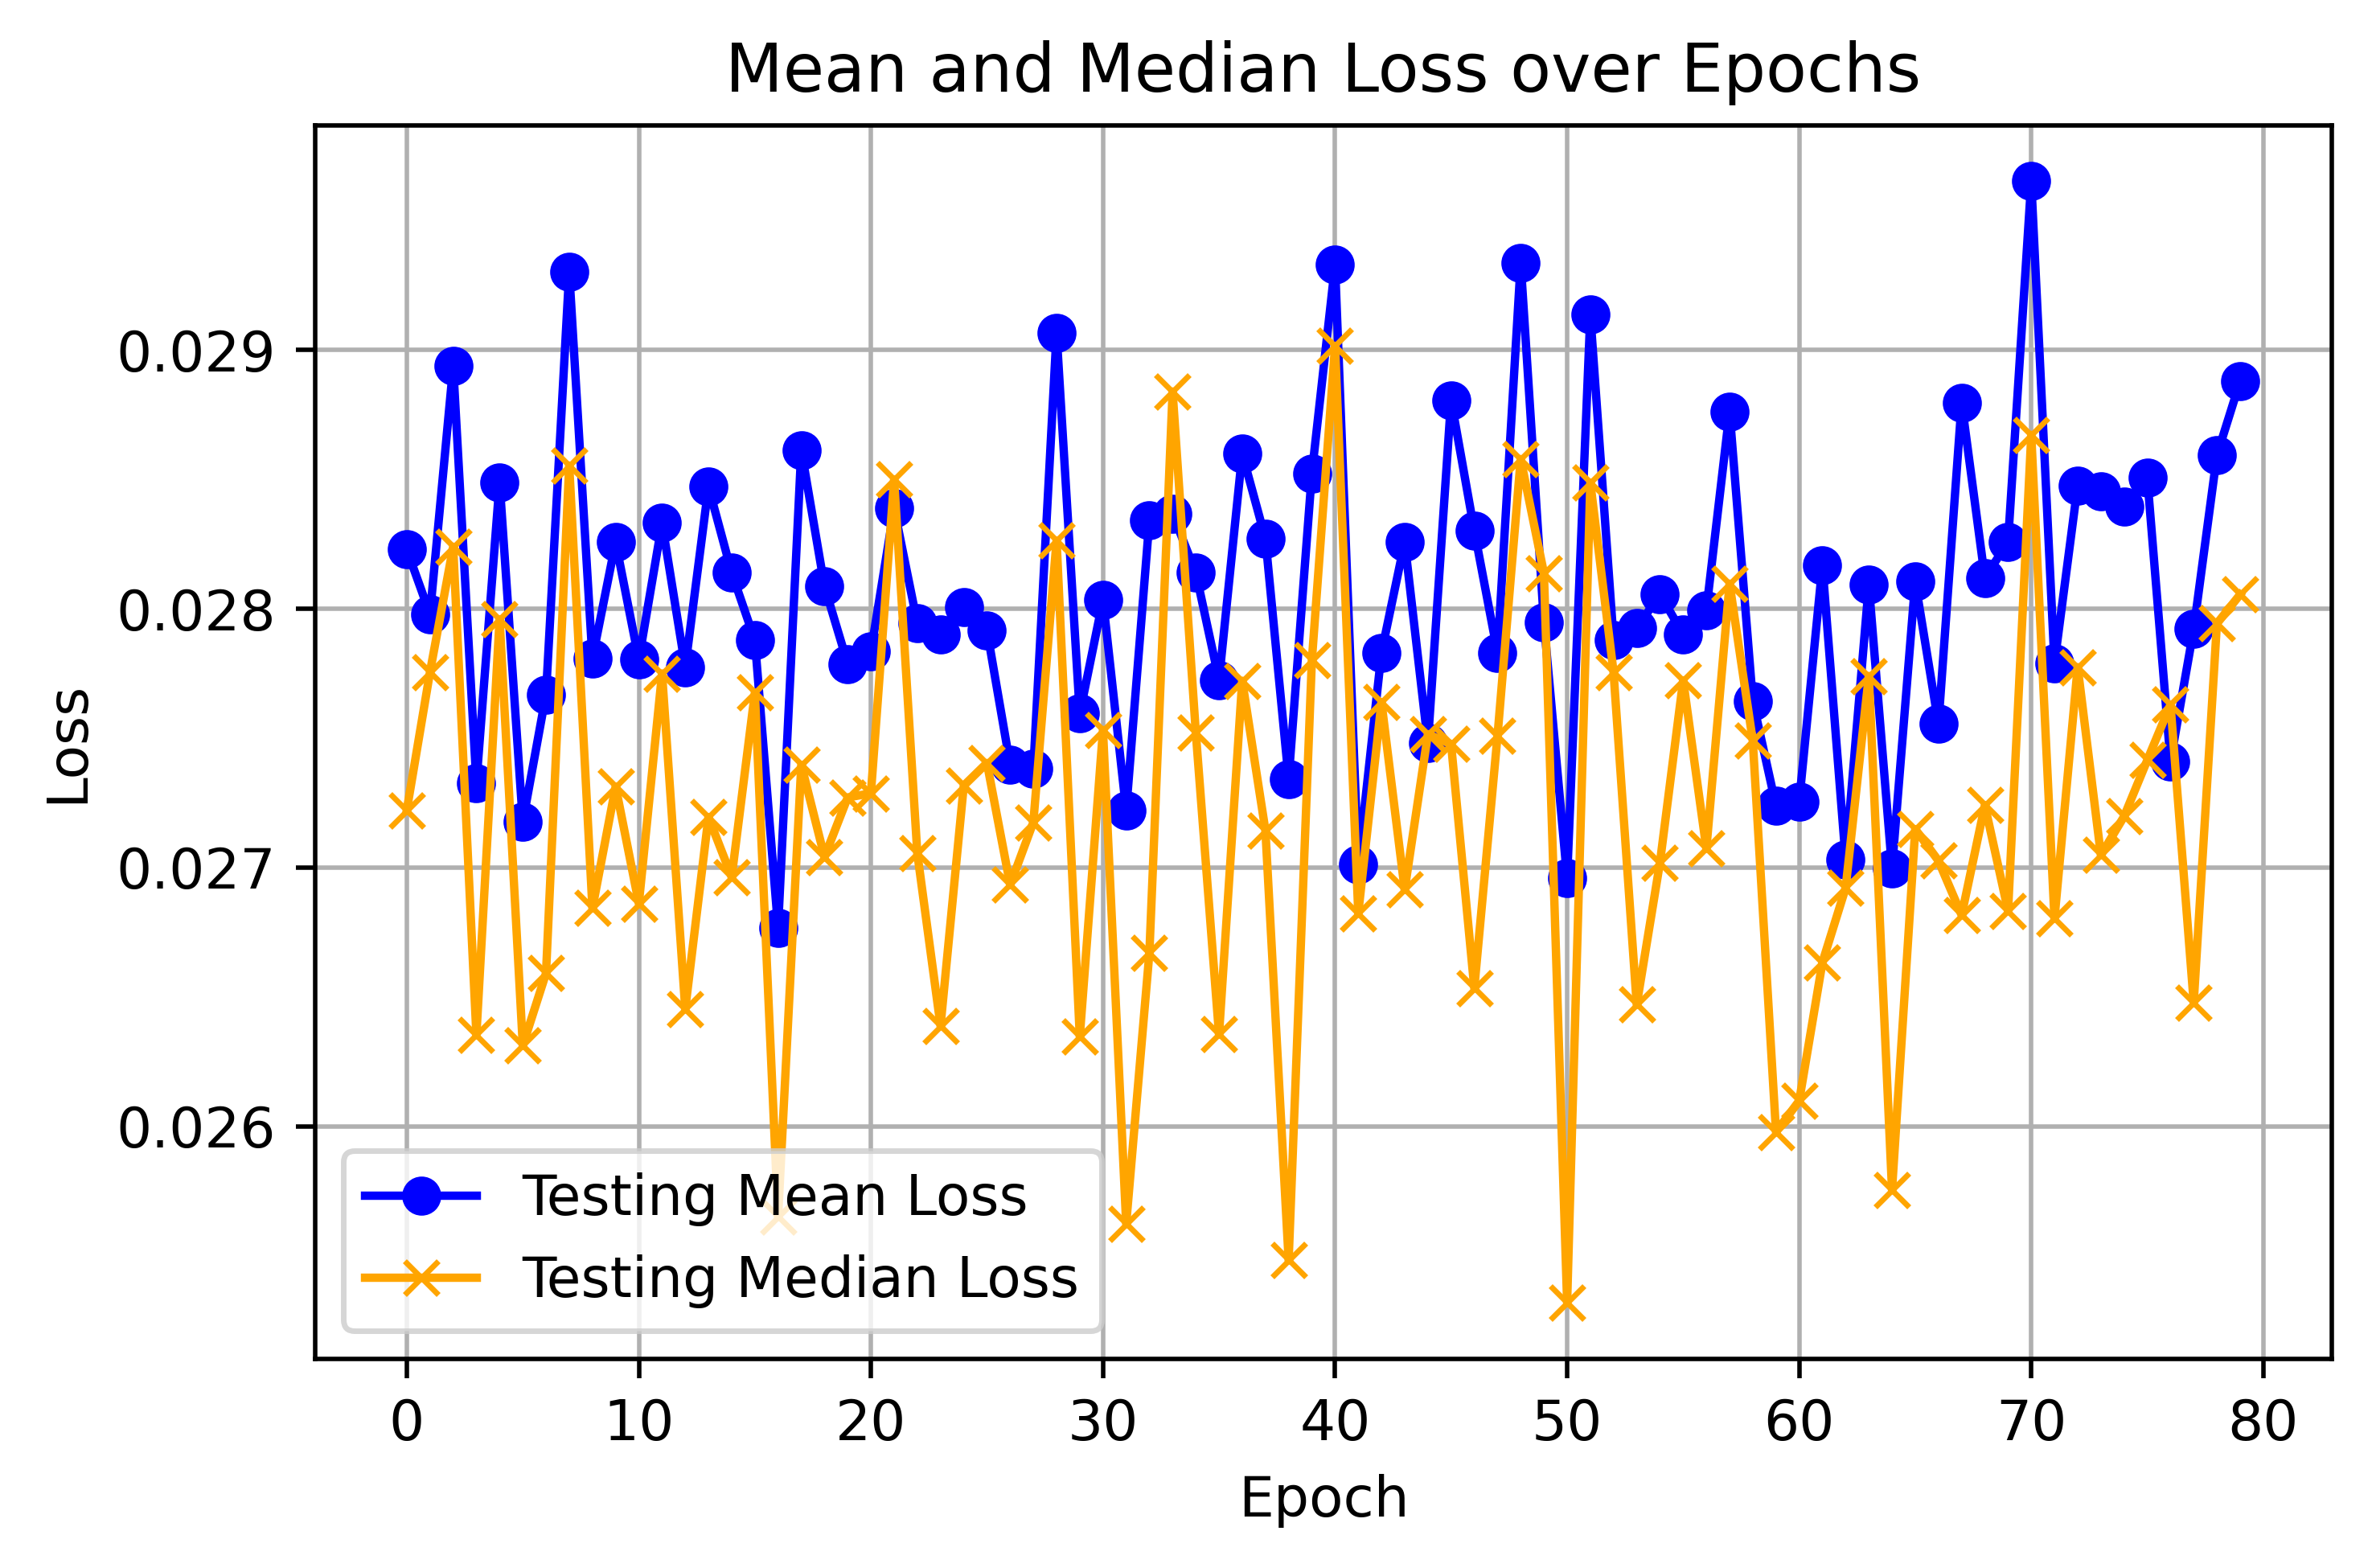

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


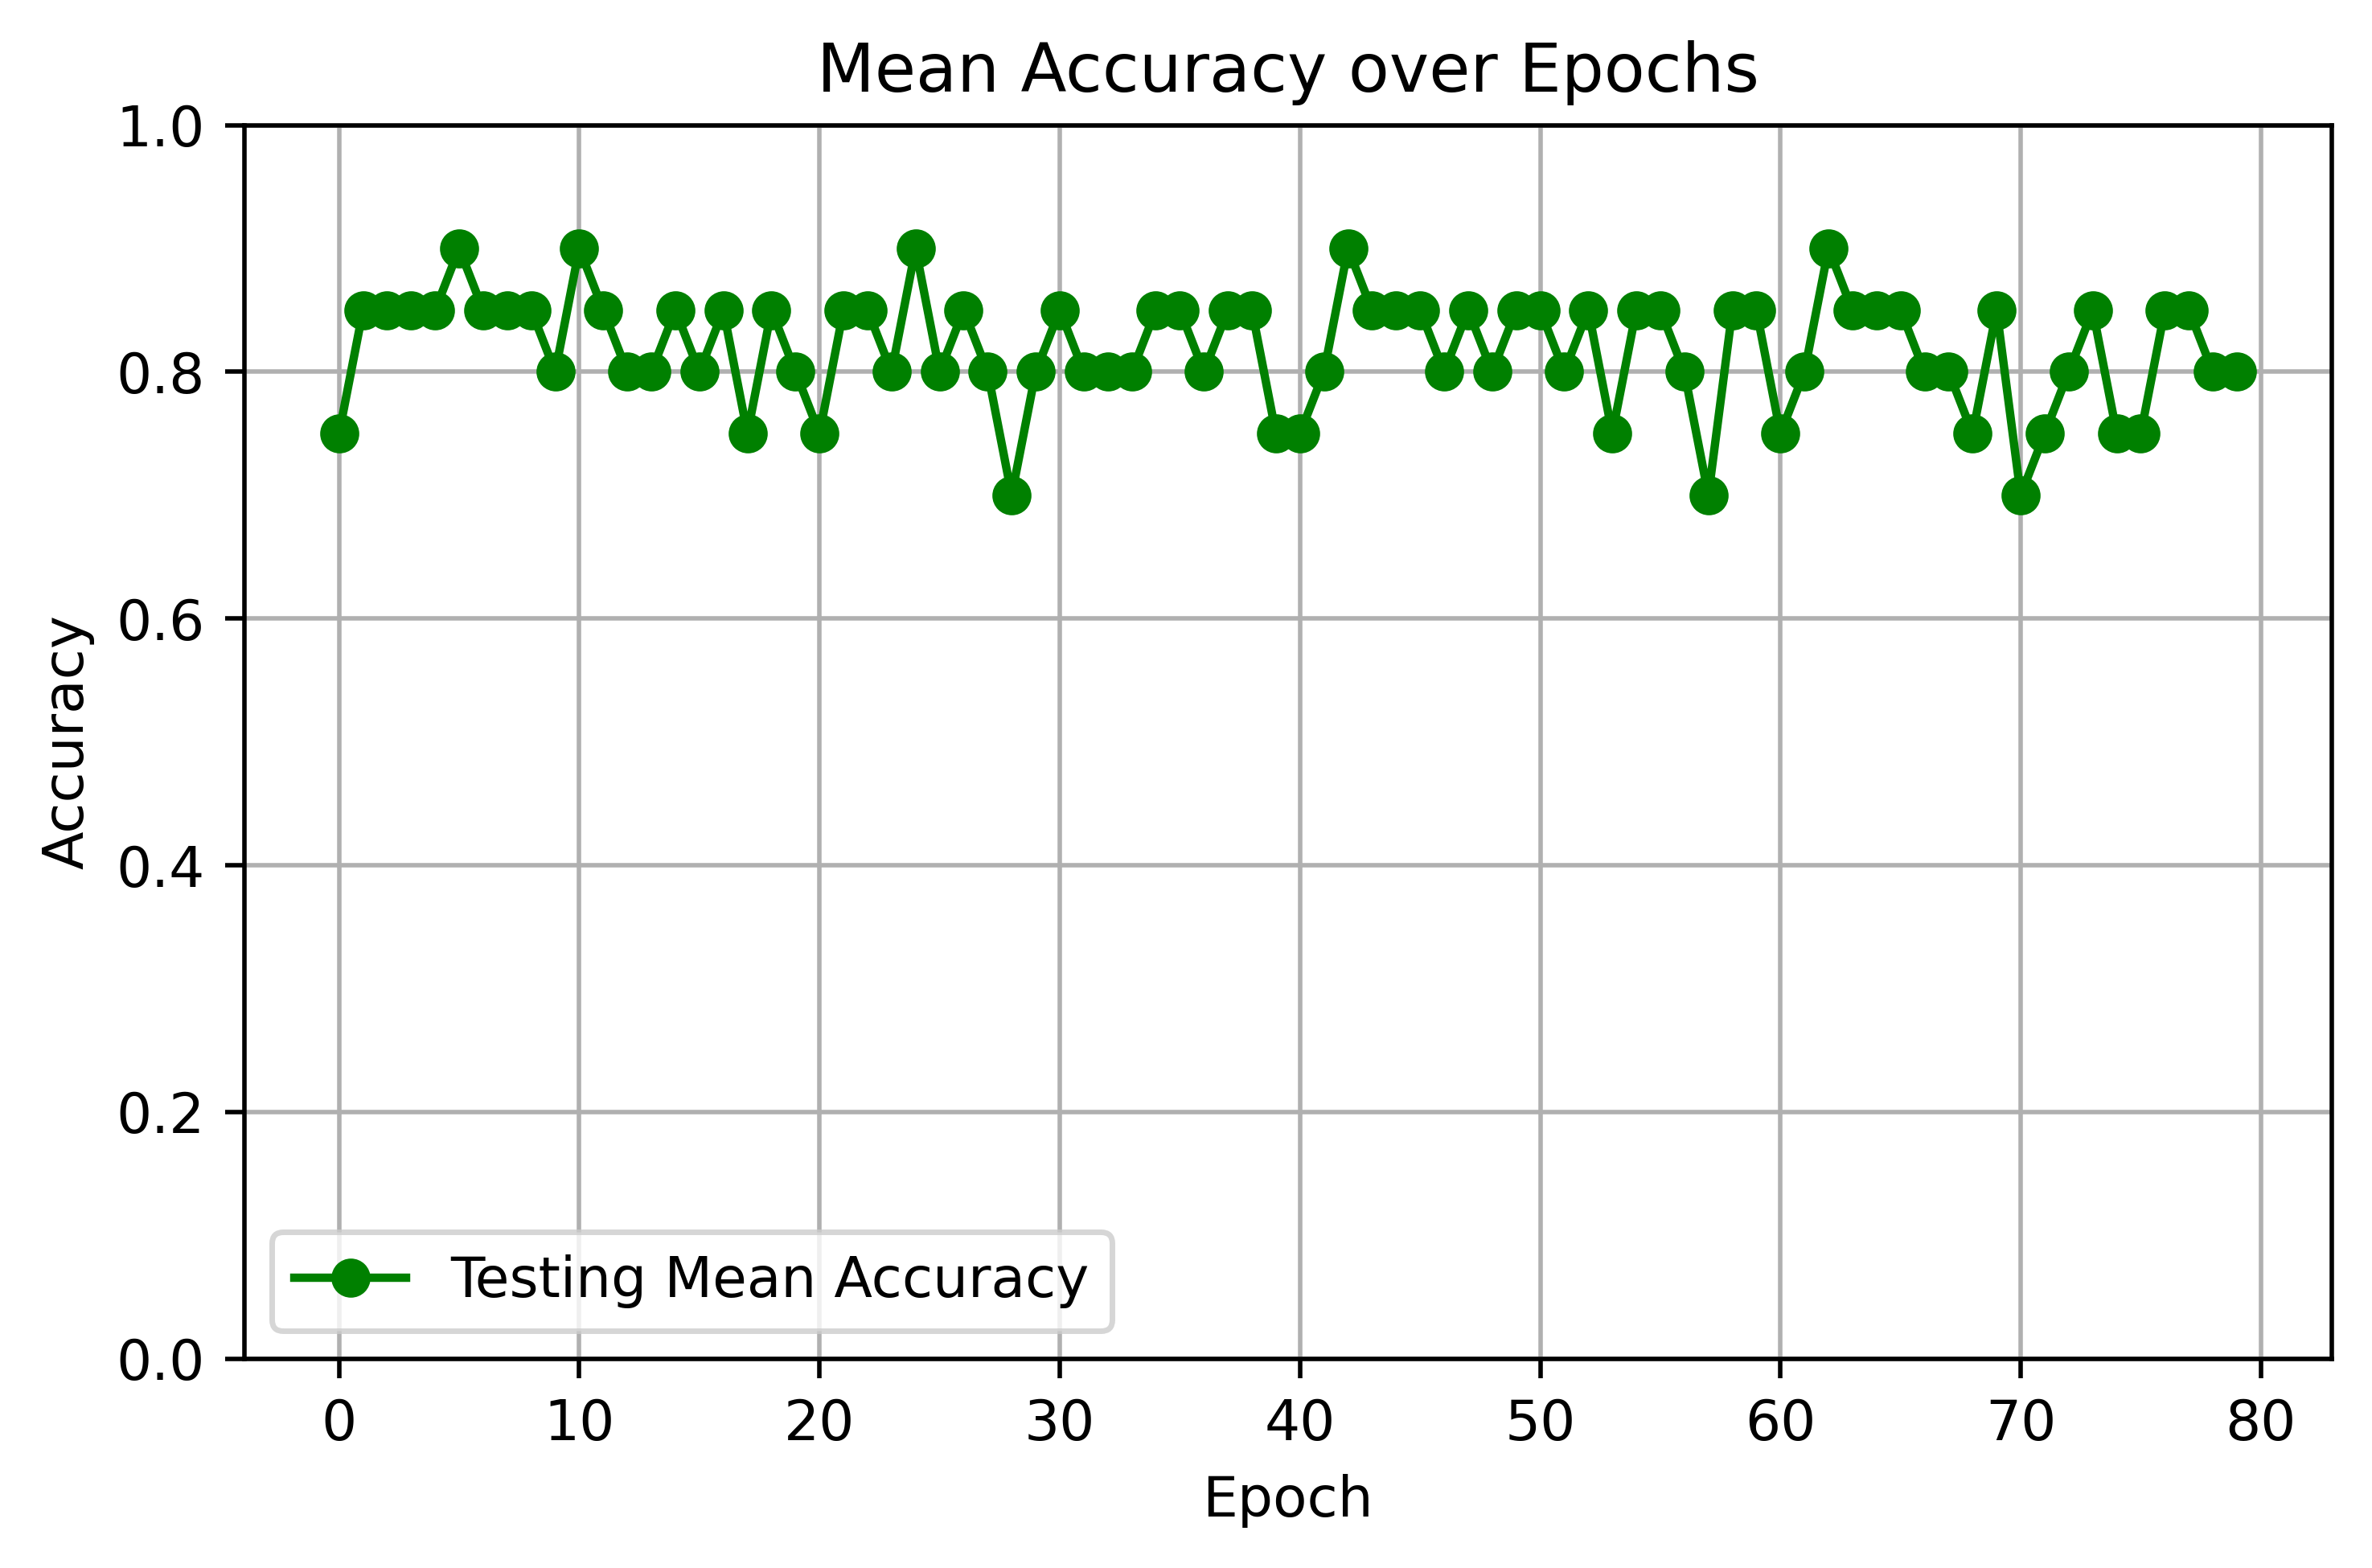

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


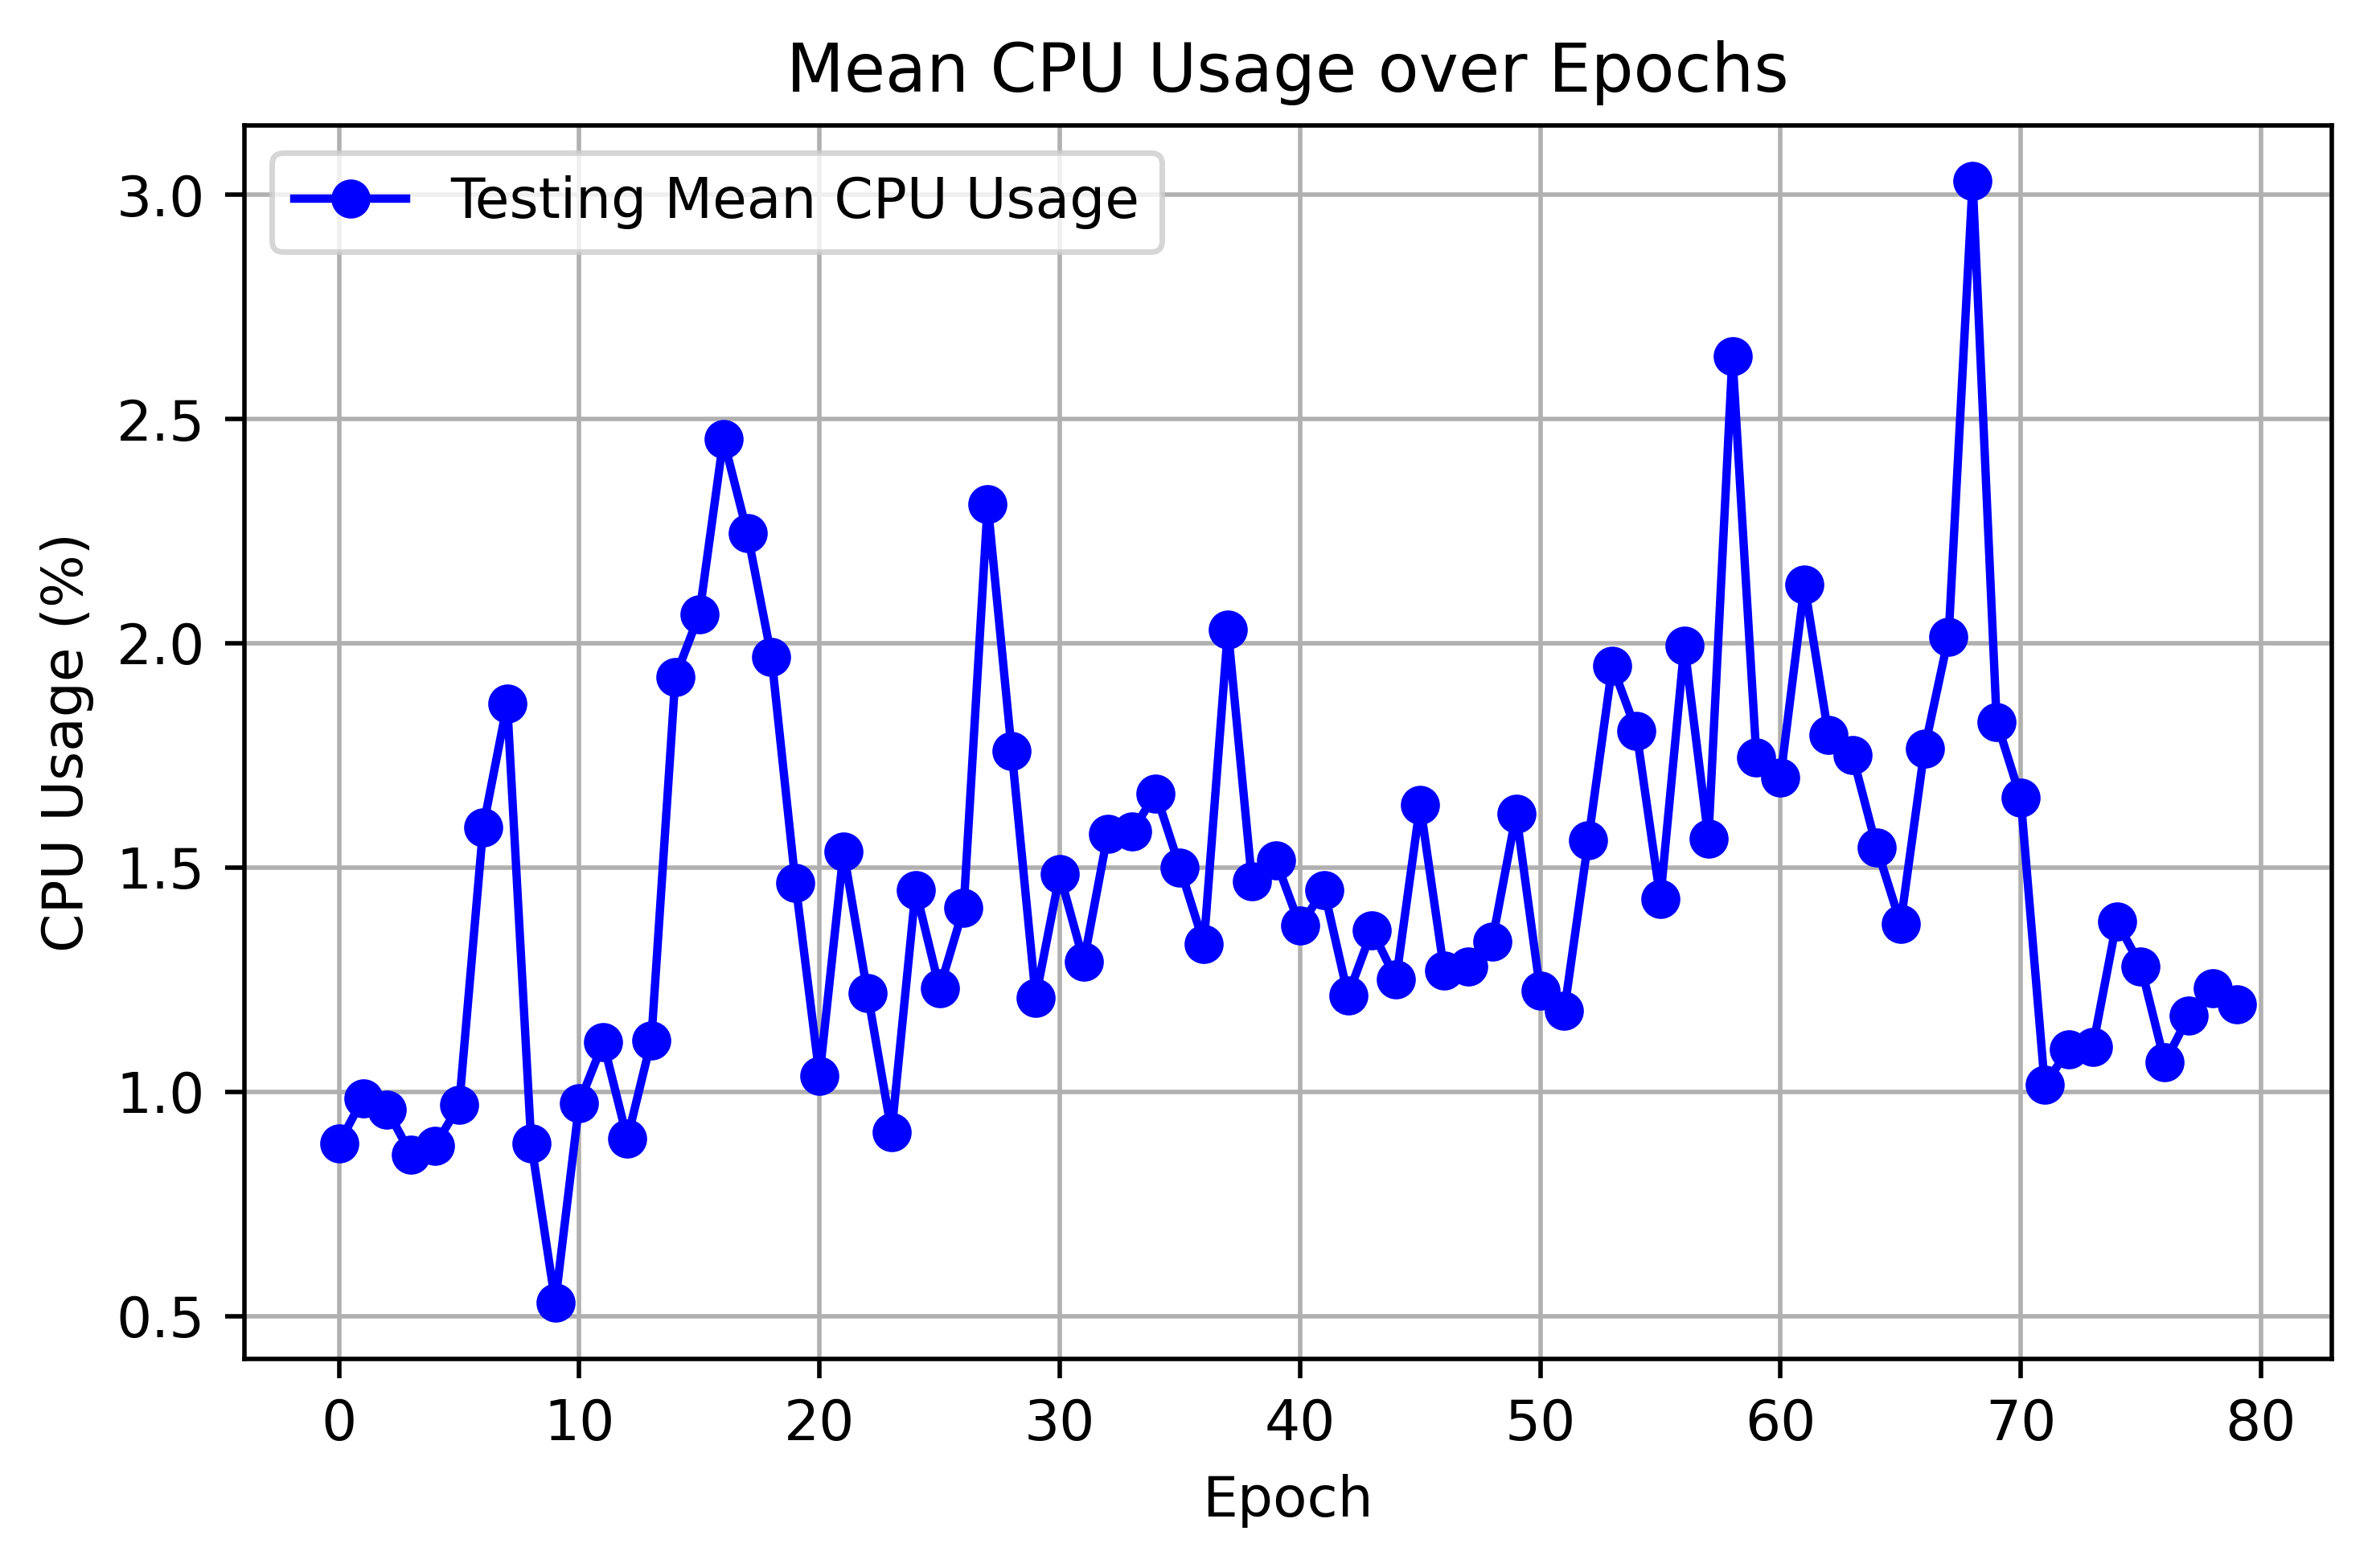

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


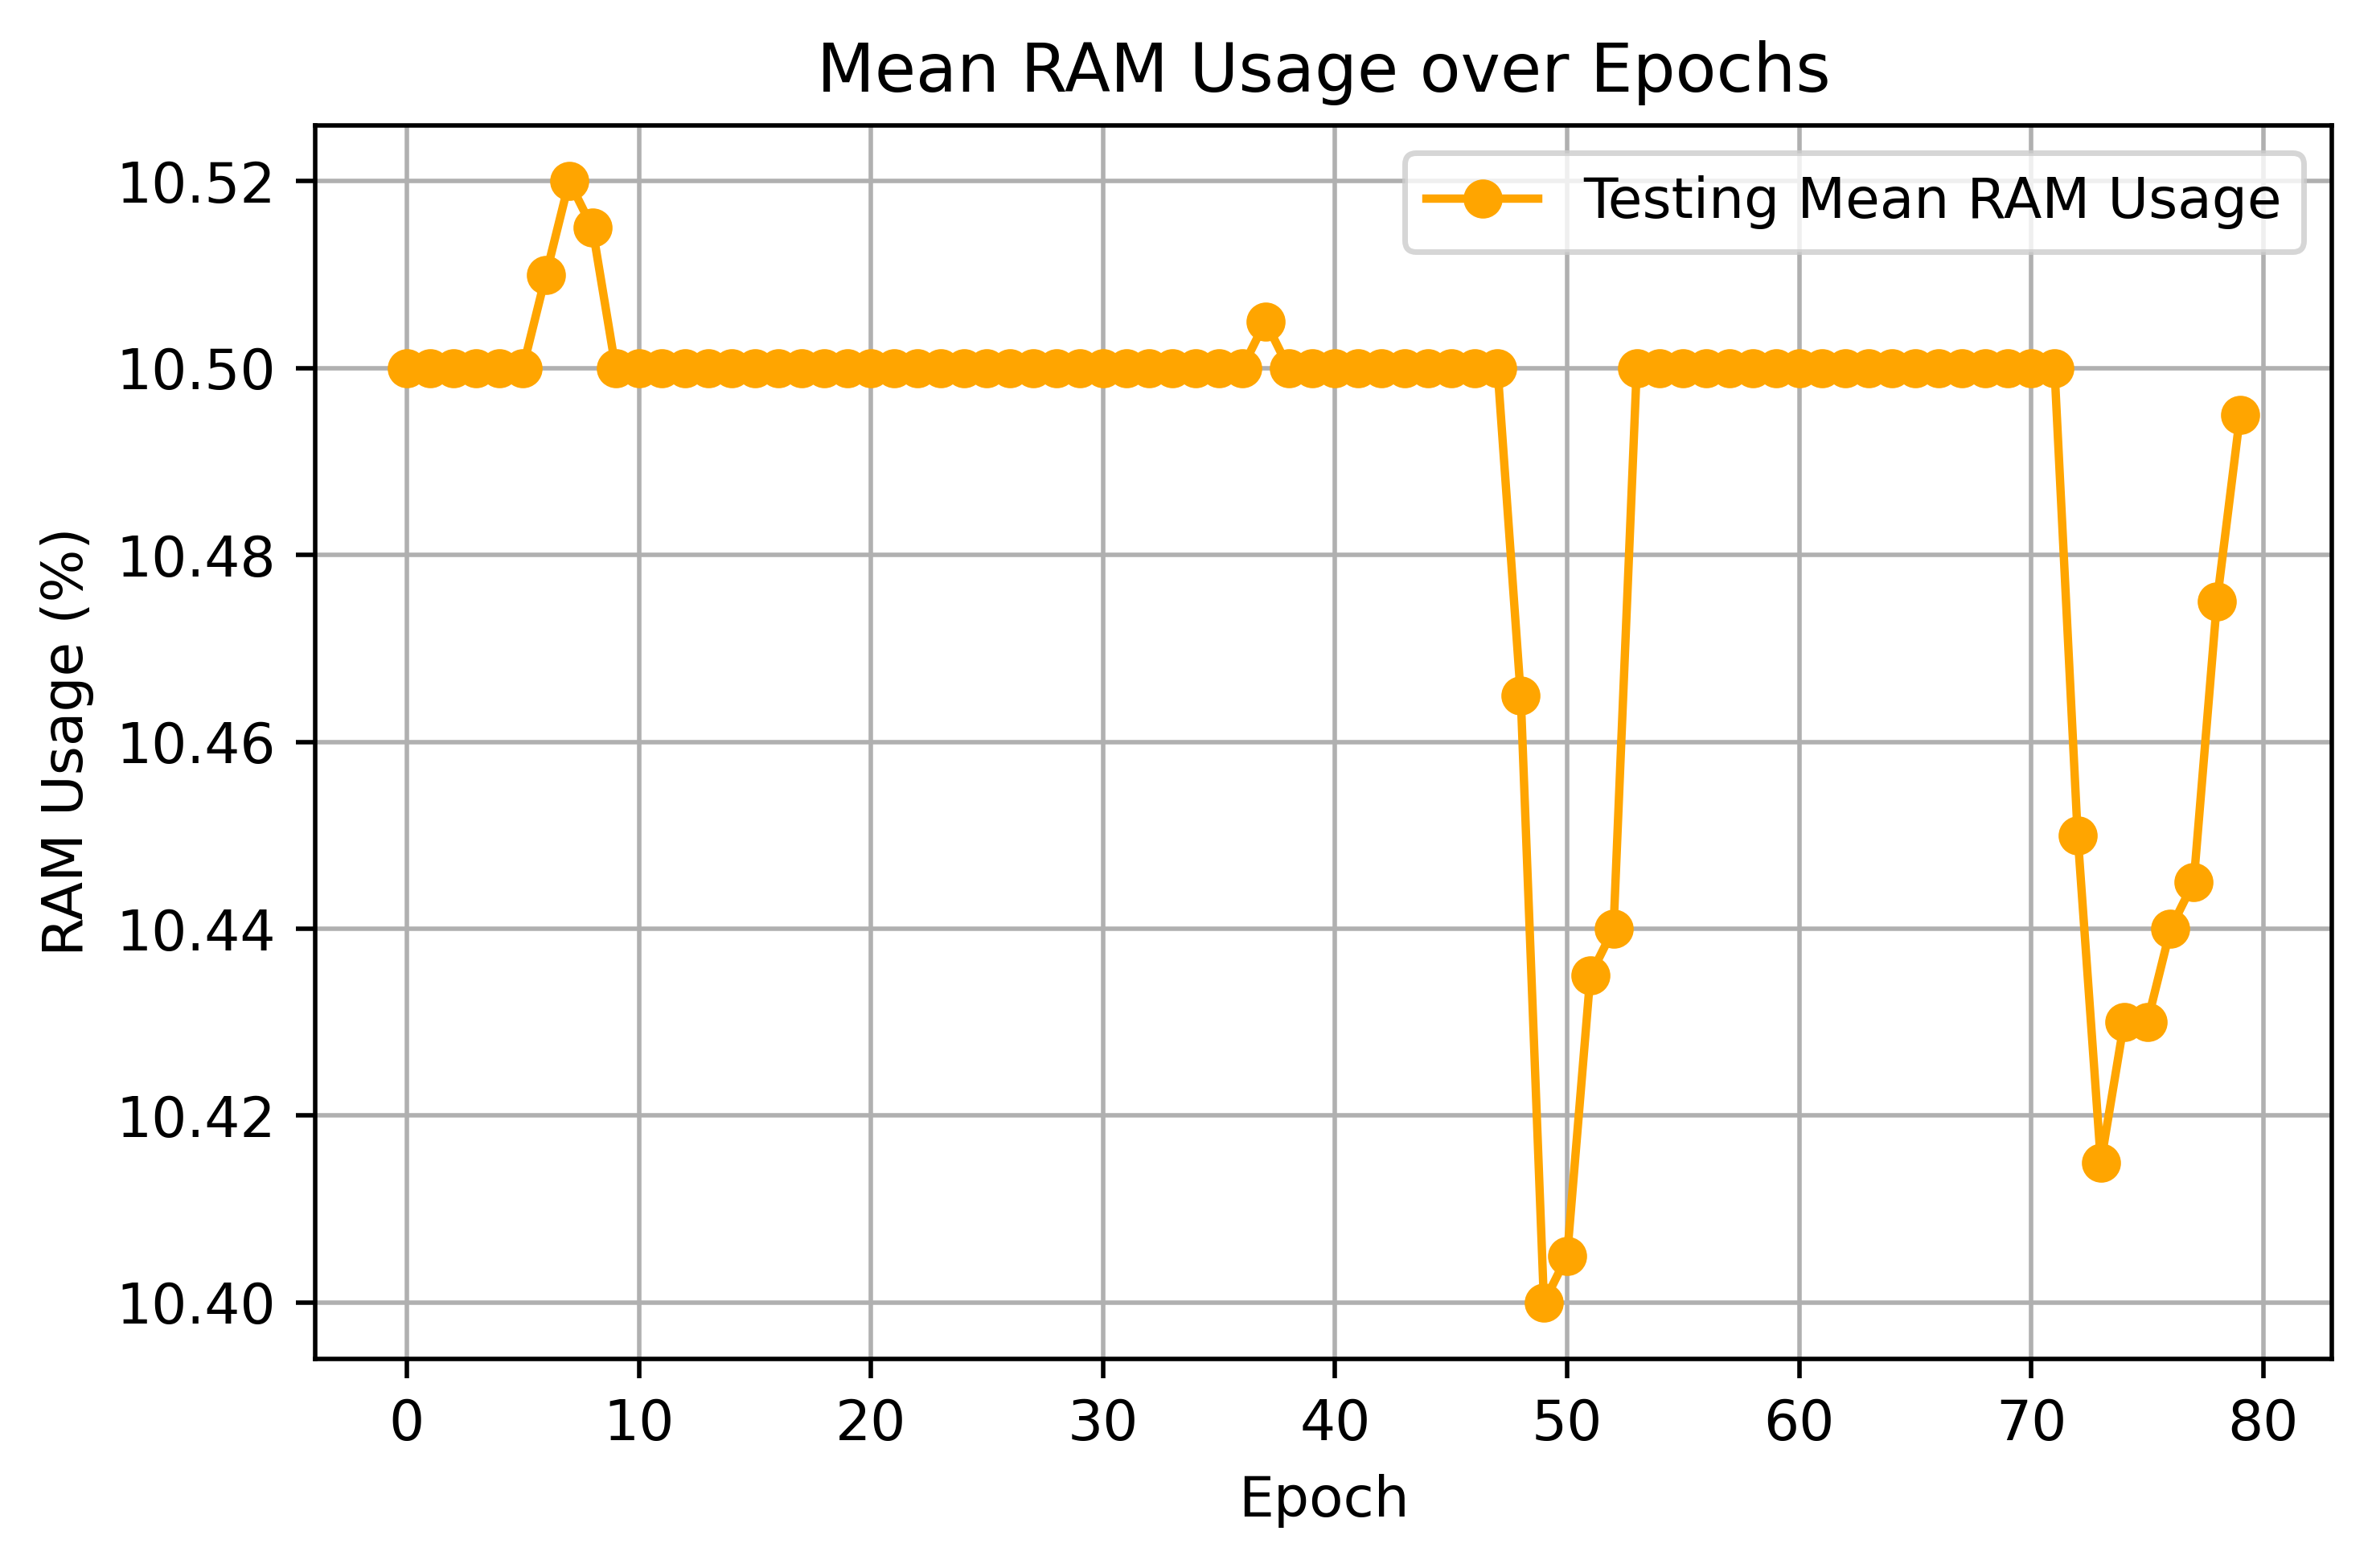

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


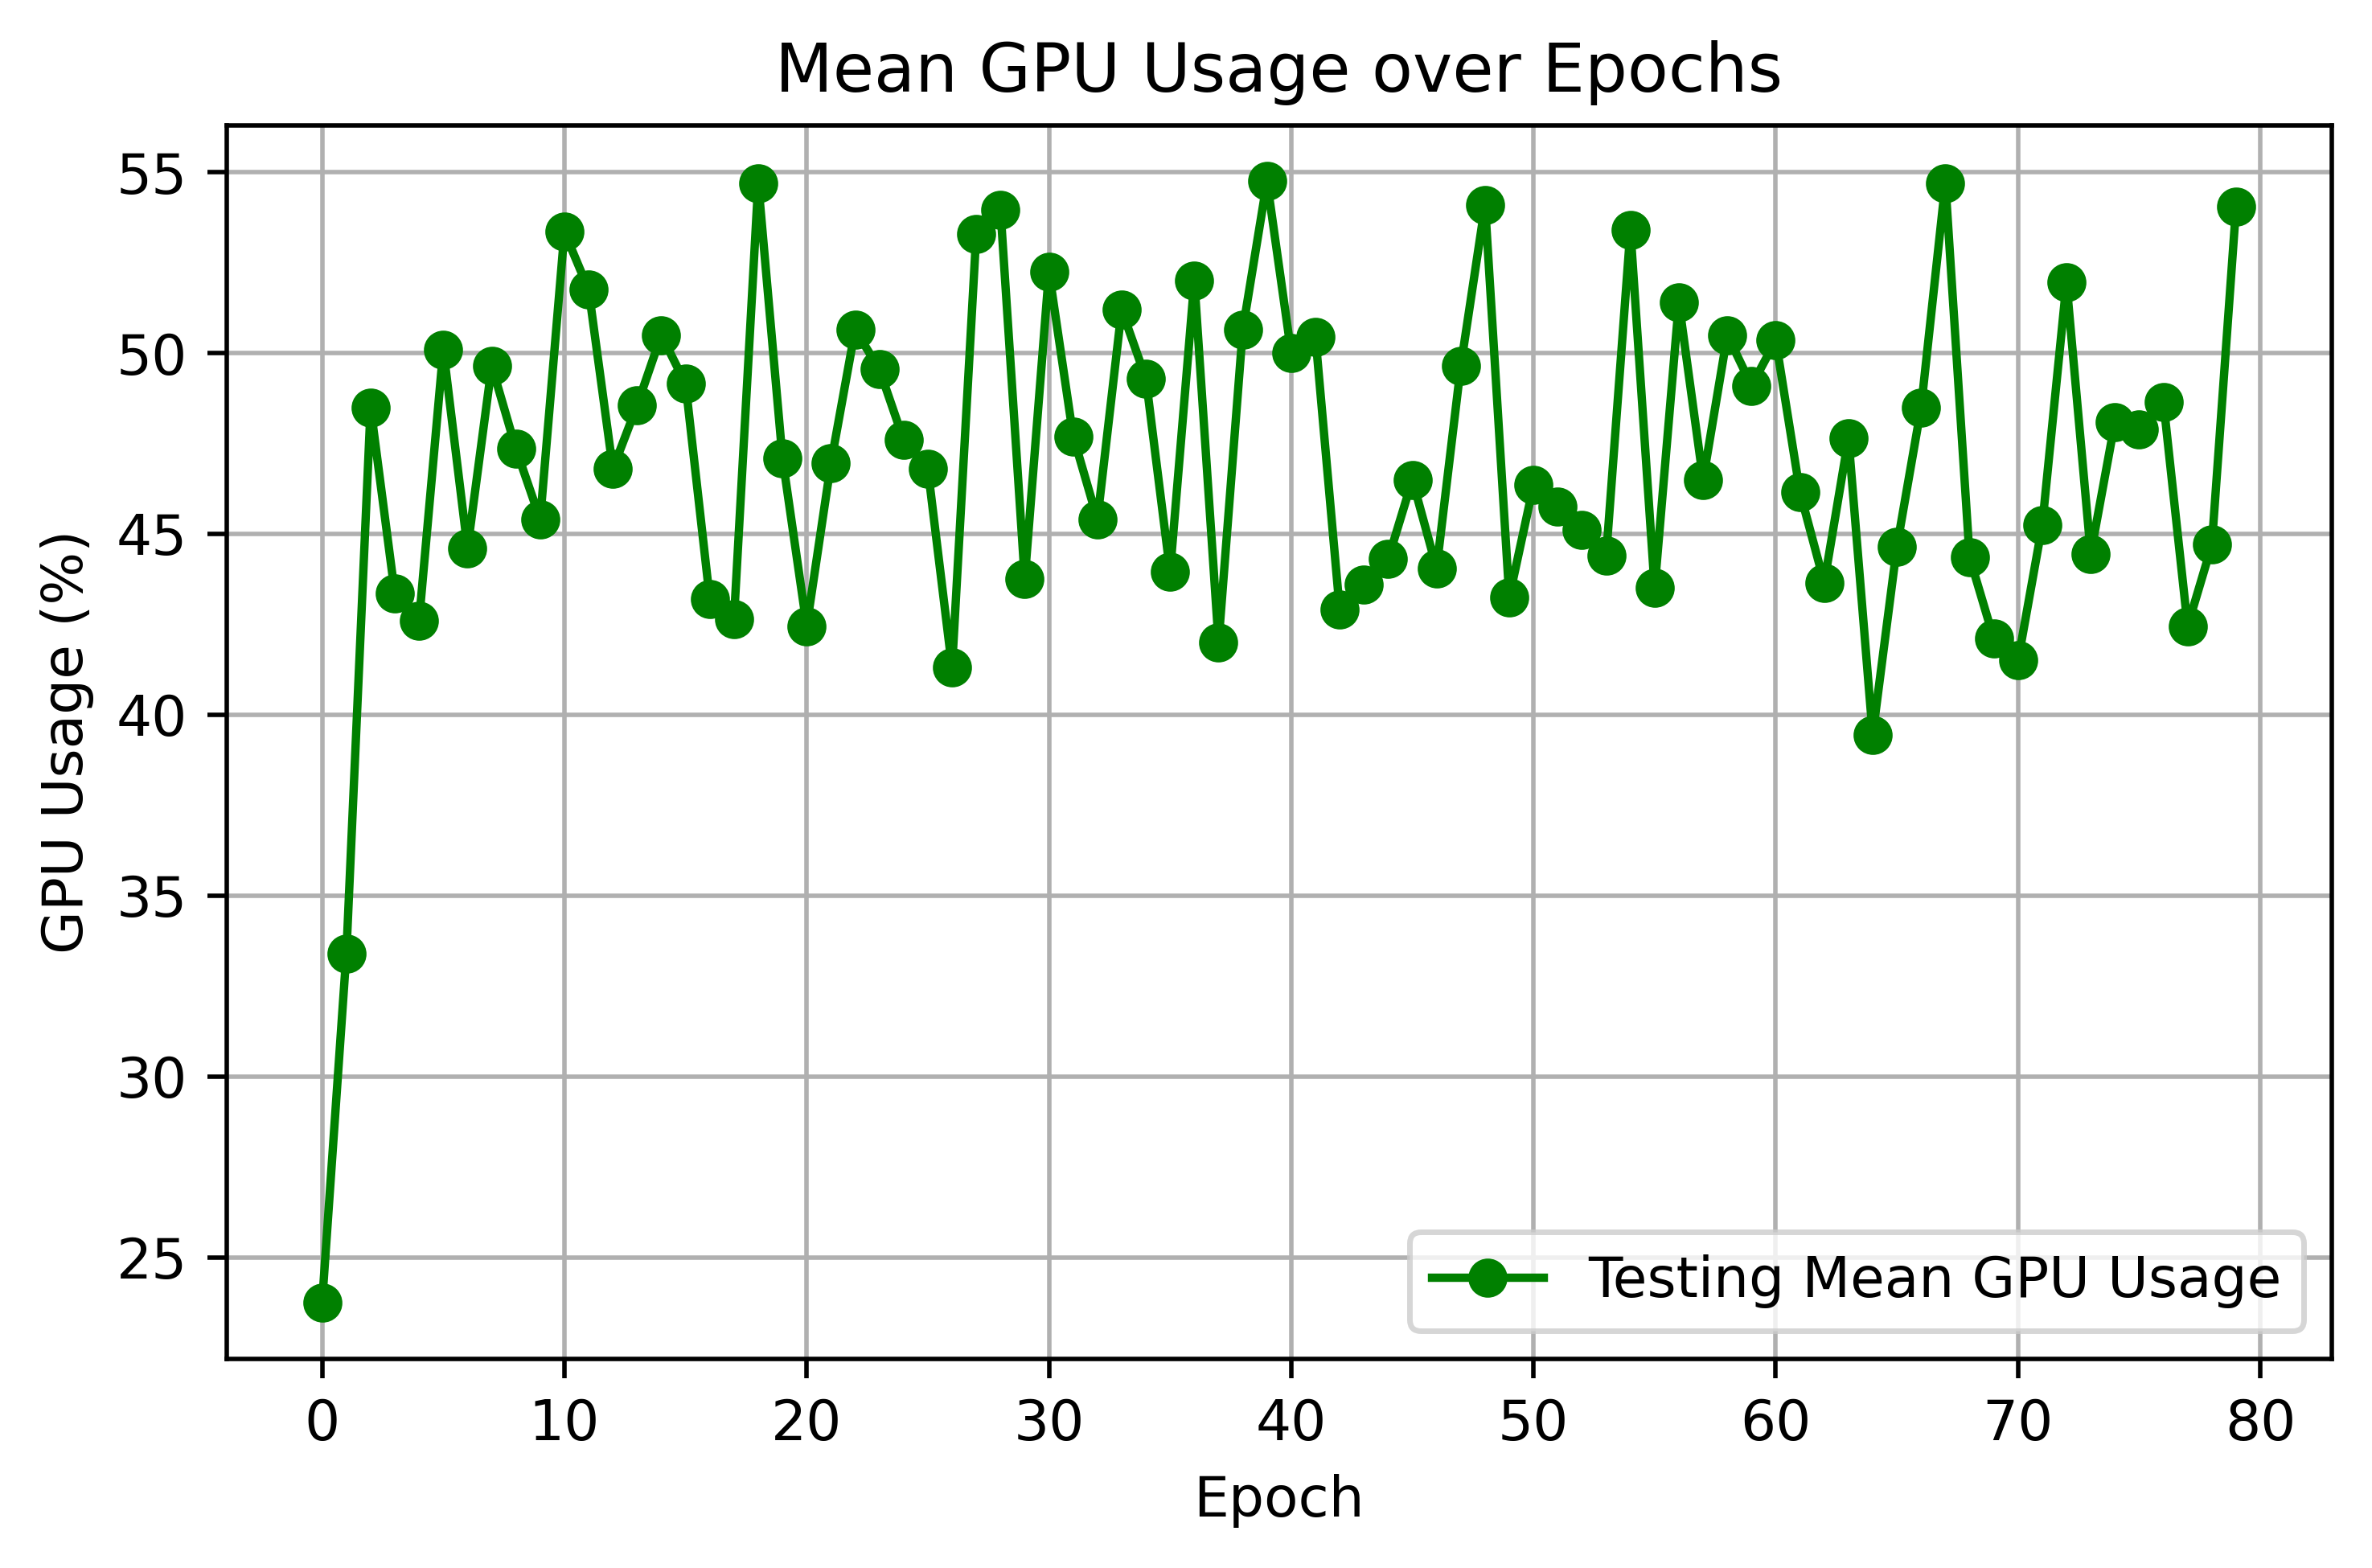

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


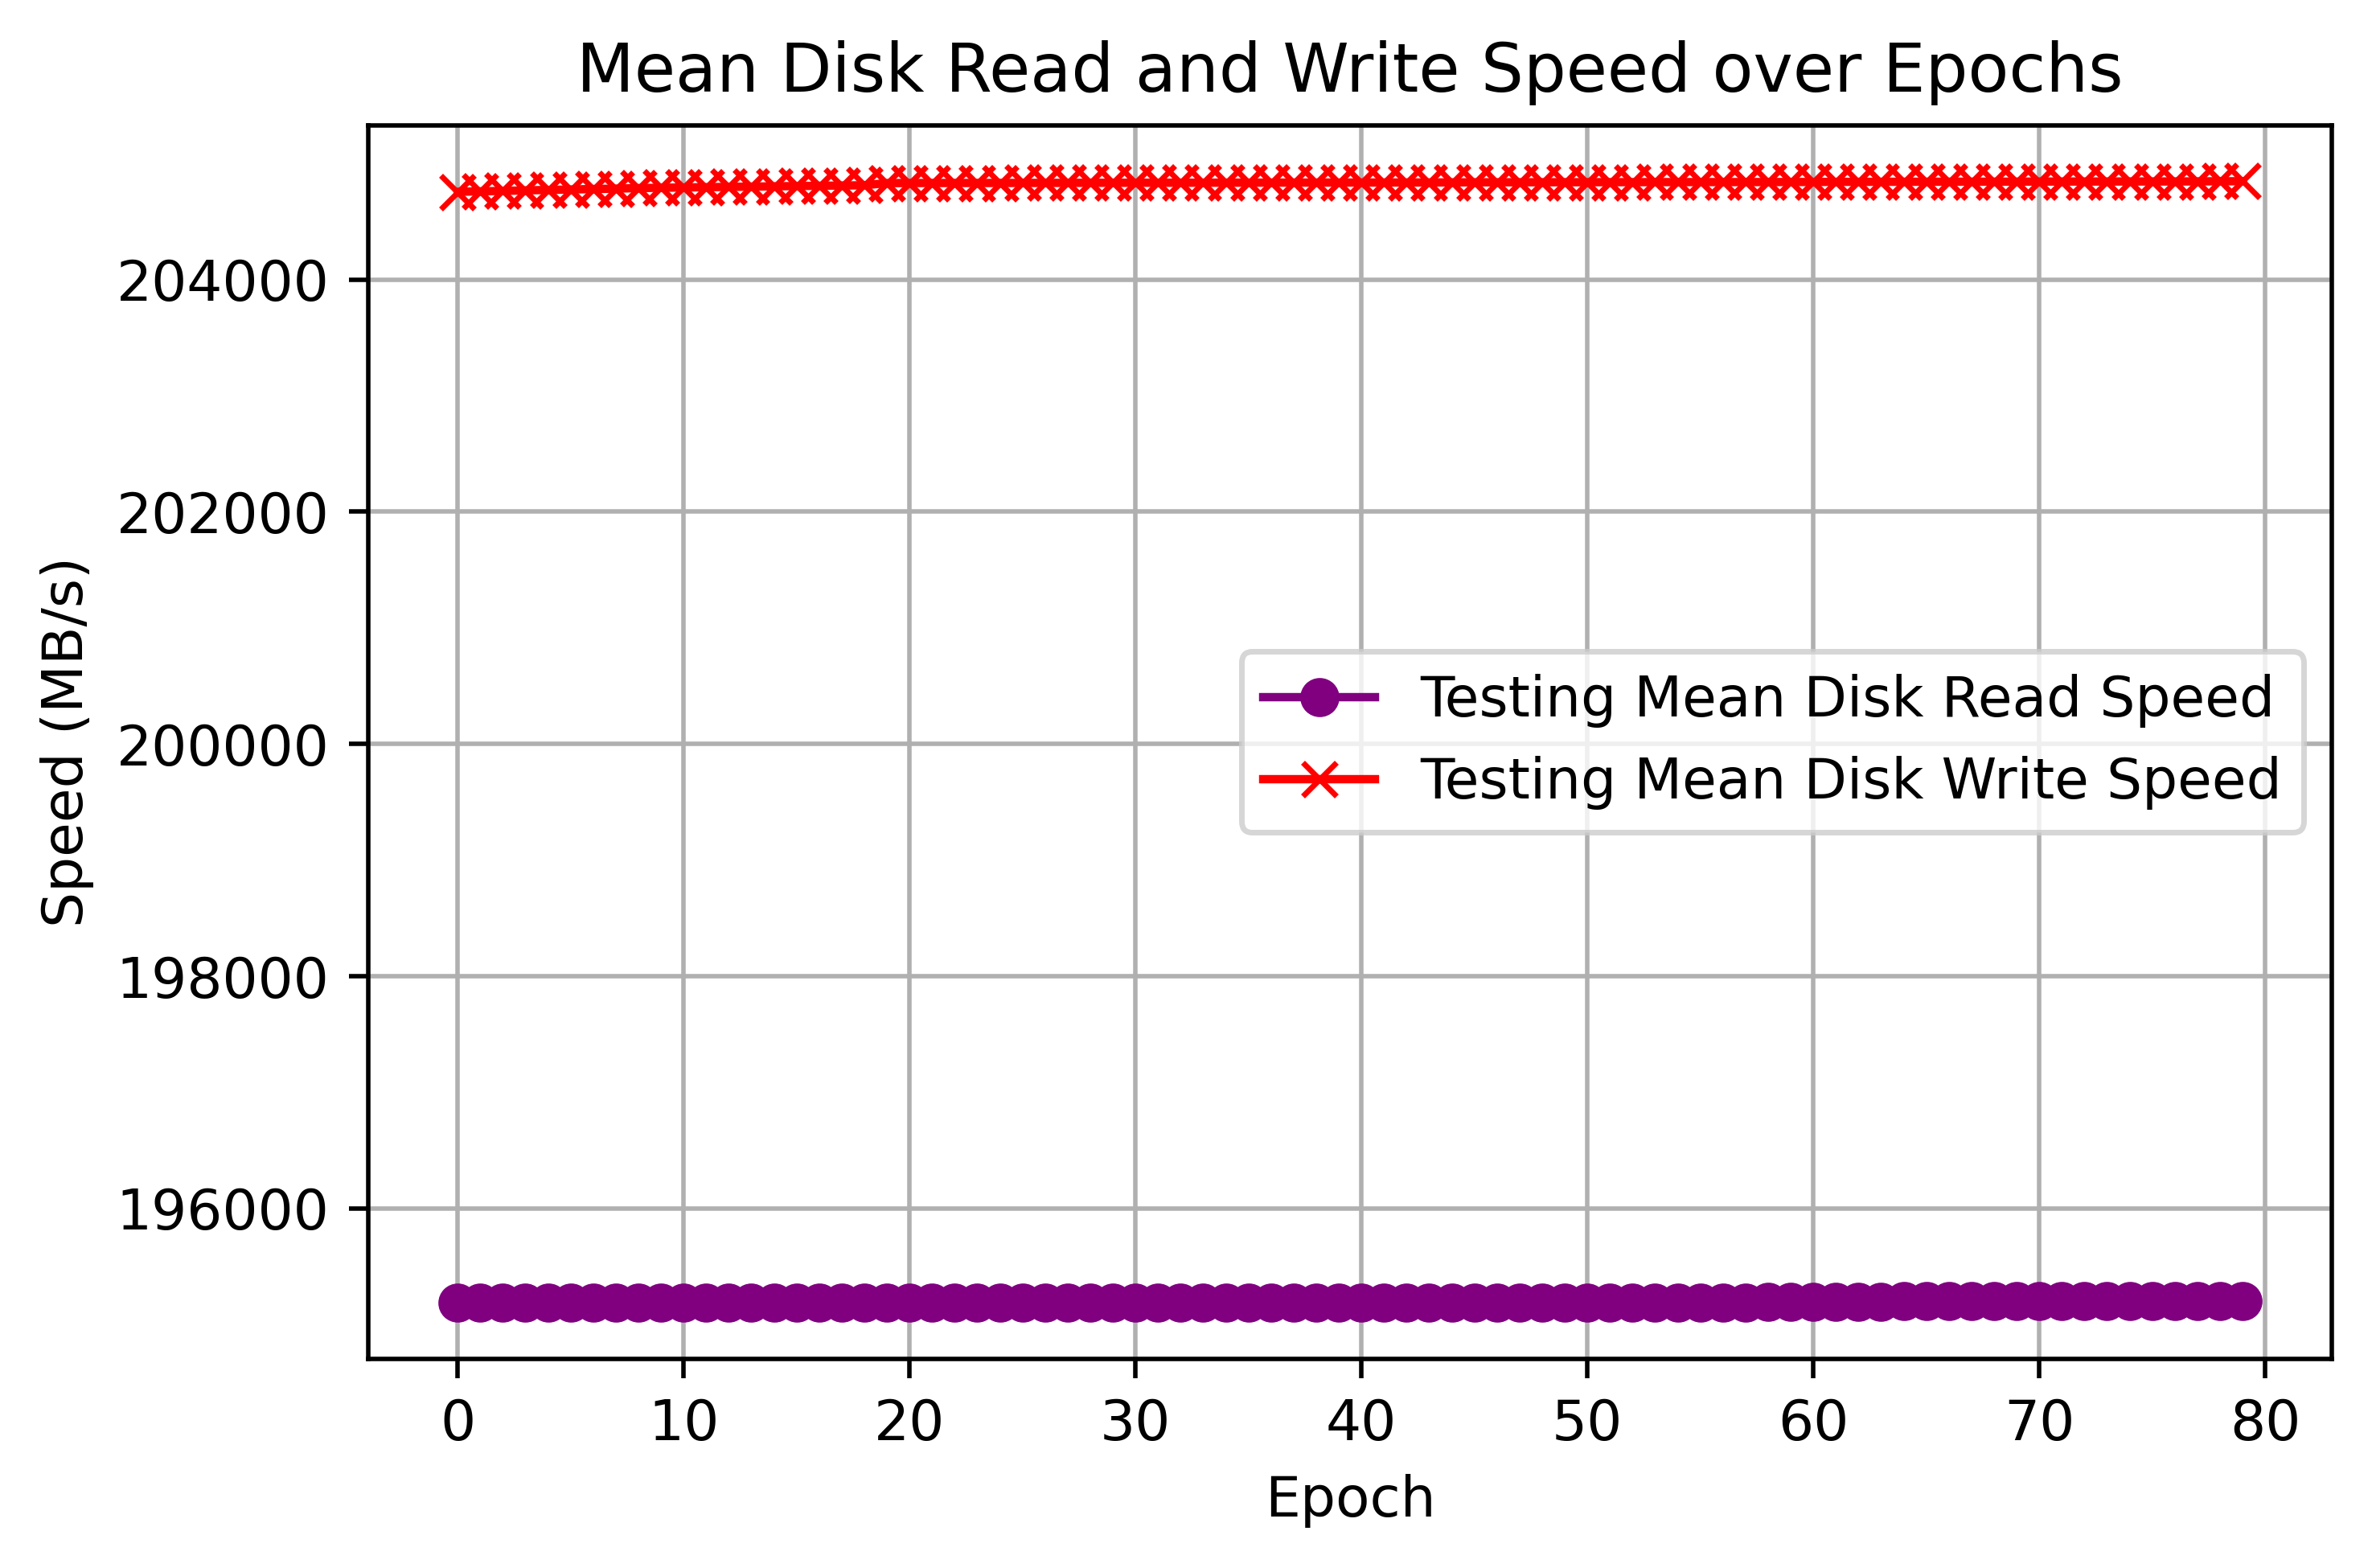

In [31]:
import matplotlib.pyplot as plt

# Plot Mean and Median Loss over Epochs (Testing)
plt.figure(figsize=(6, 4), dpi=500)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label=label_name+'Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label=label_name+'Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig(graphs_save_folder+"Testing_Mean_Median_Loss_Graph.png", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Median_Loss_Graph.eps", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Median_Loss_Graph.pdf", dpi=500, bbox_inches='tight')
plt.show()

# Plot Mean Accuracy over Epochs (Testing)
plt.figure(figsize=(6, 4), dpi=500)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label=label_name+'Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend()
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig(graphs_save_folder+"Testing_Mean_Accuracy_Graph.png", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Accuracy_Graph.eps", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Accuracy_Graph.pdf", dpi=500, bbox_inches='tight')
plt.show()

# Plot Mean CPU Usage over Epochs (Testing)
plt.figure(figsize=(6, 4), dpi=500)
plt.plot(df['Epoch'], df['Mean CPU Usage'], marker='o', label=label_name+'Mean CPU Usage', color='blue')
plt.title('Mean CPU Usage over Epochs')
plt.xlabel('Epoch')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig(graphs_save_folder+"Testing_Mean_CPU_Usage_Graph.png", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_CPU_Usage_Graph.eps", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_CPU_Usage_Graph.pdf", dpi=500, bbox_inches='tight')
plt.show()

# Plot Mean RAM Usage over Epochs (Testing)
plt.figure(figsize=(6, 4), dpi=500)
plt.plot(df['Epoch'], df['Mean RAM Usage'], marker='o', label=label_name+'Mean RAM Usage', color='orange')
plt.title('Mean RAM Usage over Epochs')
plt.xlabel('Epoch')
plt.ylabel('RAM Usage (%)')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig(graphs_save_folder+"Testing_Mean_RAM_Usage_Graph.png", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_RAM_Usage_Graph.eps", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_RAM_Usage_Graph.pdf", dpi=500, bbox_inches='tight')
plt.show()

# Plot Mean GPU Usage over Epochs (Testing)
plt.figure(figsize=(6, 4), dpi=500)
plt.plot(df['Epoch'], df['Mean GPU Usage'], marker='o', label=label_name+'Mean GPU Usage', color='green')
plt.title('Mean GPU Usage over Epochs')
plt.xlabel('Epoch')
plt.ylabel('GPU Usage (%)')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig(graphs_save_folder+"Testing_Mean_GPU_Usage_Graph.png", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_GPU_Usage_Graph.eps", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_GPU_Usage_Graph.pdf", dpi=500, bbox_inches='tight')
plt.show()

# Plot Mean Disk Read and Write Speed over Epochs (Testing)
plt.figure(figsize=(6, 4), dpi=500)
plt.plot(df['Epoch'], df['Mean Disk Read Speed'], marker='o', label=label_name+'Mean Disk Read Speed', color='purple')
plt.plot(df['Epoch'], df['Mean Disk Write Speed'], marker='x', label=label_name+'Mean Disk Write Speed', color='red')
plt.title('Mean Disk Read and Write Speed over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Speed (MB/s)')
plt.legend()
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig(graphs_save_folder+"Testing_Mean_Disk_Speed_Graph.png", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Disk_Speed_Graph.eps", dpi=500, bbox_inches='tight')
plt.savefig(graphs_save_folder+"Testing_Mean_Disk_Speed_Graph.pdf", dpi=500, bbox_inches='tight')
plt.show()


NameError: name 'label_name' is not defined

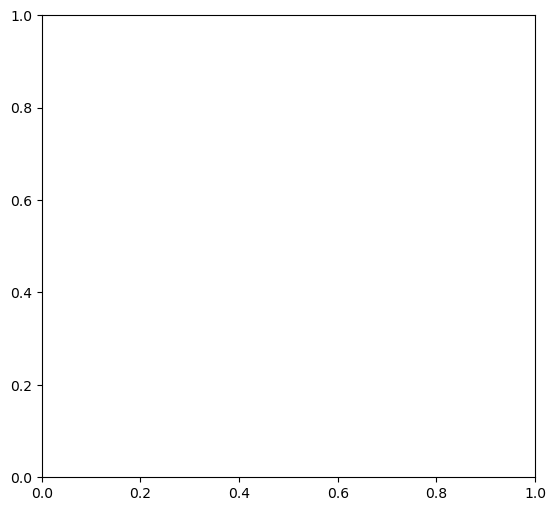

In [13]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the log files (update this path as needed)
log_dir = r'C:\Users\User\Documents\ADR\Viz Testing\test_log_data'

# Initialize lists to store the data
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []

# Read all the custom_logs_epoch_test_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_test_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract mean and median losses, and accuracies
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step['test_loss'] for step in data['steps']]
        actions_preds = [step['actions_pred'] for step in data['steps']]  # Ensure this key exists in your logs
        actions = [step['actions'] for step in data['steps']]  # Ground truth actions
        
        # Calculate mean and median losses
        mean_loss = sum(losses) / len(losses)
        median_loss = pd.Series(losses).median()
        
        mean_losses.append(mean_loss)
        median_losses.append(median_loss)

        # Calculate accuracy
        accuracies = []
        for preds, true_actions in zip(actions_preds, actions):
            preds_array = np.array(preds)  # Shape: (1, 3, 20)
            true_actions_array = np.array(true_actions)  # Shape: (1, 20, 1)

            # Convert true actions to classes
            true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())  # Shape: (20,)

            # Get the index of the maximum predicted value
            preds_indices = preds_array.argmax(axis=1).flatten()  # Shape: (20,)

            # Calculate accuracy
            accuracy = (preds_indices == true_actions_classes).mean()
            accuracies.append(accuracy)

            # if accuracy != 0:
            #     print("accuracy", accuracy)

            # Calculate accuracy
            # print("preds_indices",preds_indices)
            # print("true_actions_classes",true_actions_classes)
            # print("preds_indices.shape",preds_indices.shape)
            # print("preds_array.shape",preds_array.shape)
            # print("true_actions_classes.shape",true_actions_classes.shape)

        mean_accuracy = np.mean(accuracies) if accuracies else None
        mean_accuracies.append(mean_accuracy)



# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies
})

# Plotting
plt.figure(figsize=(14, 6))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label=label_name+'Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label=label_name+'Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label=label_name+'Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


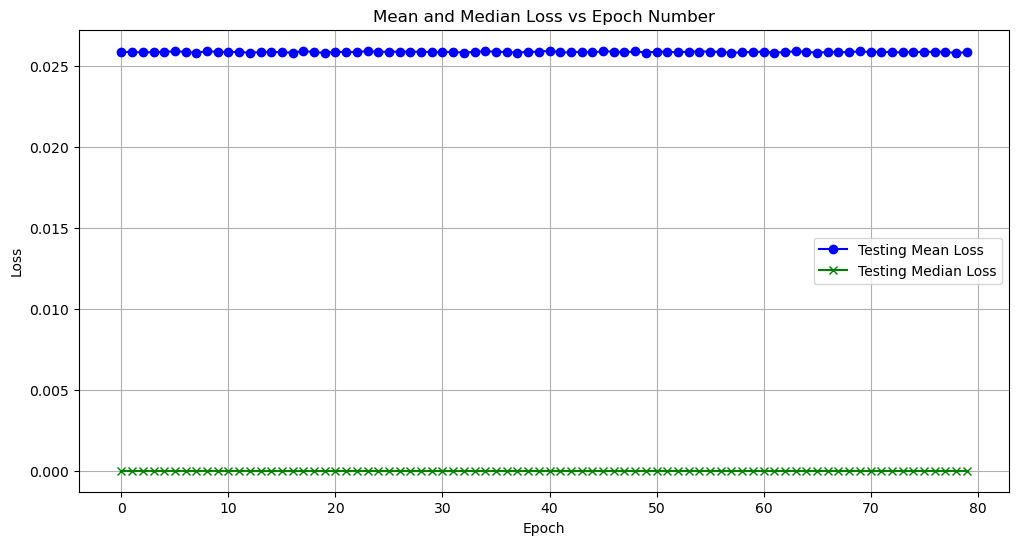

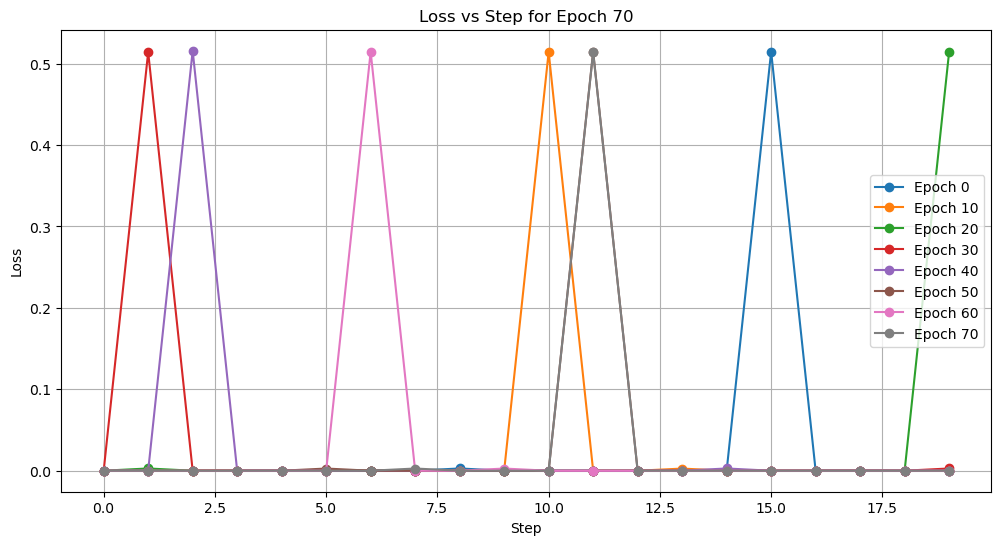

In [33]:


# Plot mean average loss vs epoch number
plt.figure(figsize=(12, 6))
plt.plot(df['Epoch'], df['Mean Loss'], label=label_name+'Mean Loss', marker='o', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], label=label_name+'Median Loss', marker='x', color='green')
plt.title('Mean and Median Loss vs Epoch Number')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))


# Plot loss vs step for each epoch

for index in range(0, len(log_files), 10):
    log_file = log_files[index]
    # print(log_file)
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    
    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        steps = [step['step'] for step in data['steps']]
        losses = [step['test_loss'] for step in data['steps']]    
    plt.plot(steps, losses, label=f'Epoch {epoch_number}', marker='o')
plt.title(f'Loss vs Step for Epoch {epoch_number}')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# # Plot loss vs step for each epoch
# for log_file in log_files:
#     epoch_number = int(log_file.split('_')[-1].split('.')[0])
    
#     with open(os.path.join(log_dir, log_file), 'r') as file:
#         data = json.load(file)
#         steps = [step['step'] for step in data['steps']]
#         losses = [step['test_loss'] for step in data['steps']]
    
#     plt.figure(figsize=(12, 6))
#     plt.plot(steps, losses, label=f'Epoch {epoch_number}', marker='o')
#     plt.title(f'Loss vs Step for Epoch {epoch_number}')
#     plt.xlabel('Step')
#     plt.ylabel('Loss')
#     plt.grid(True)
#     plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


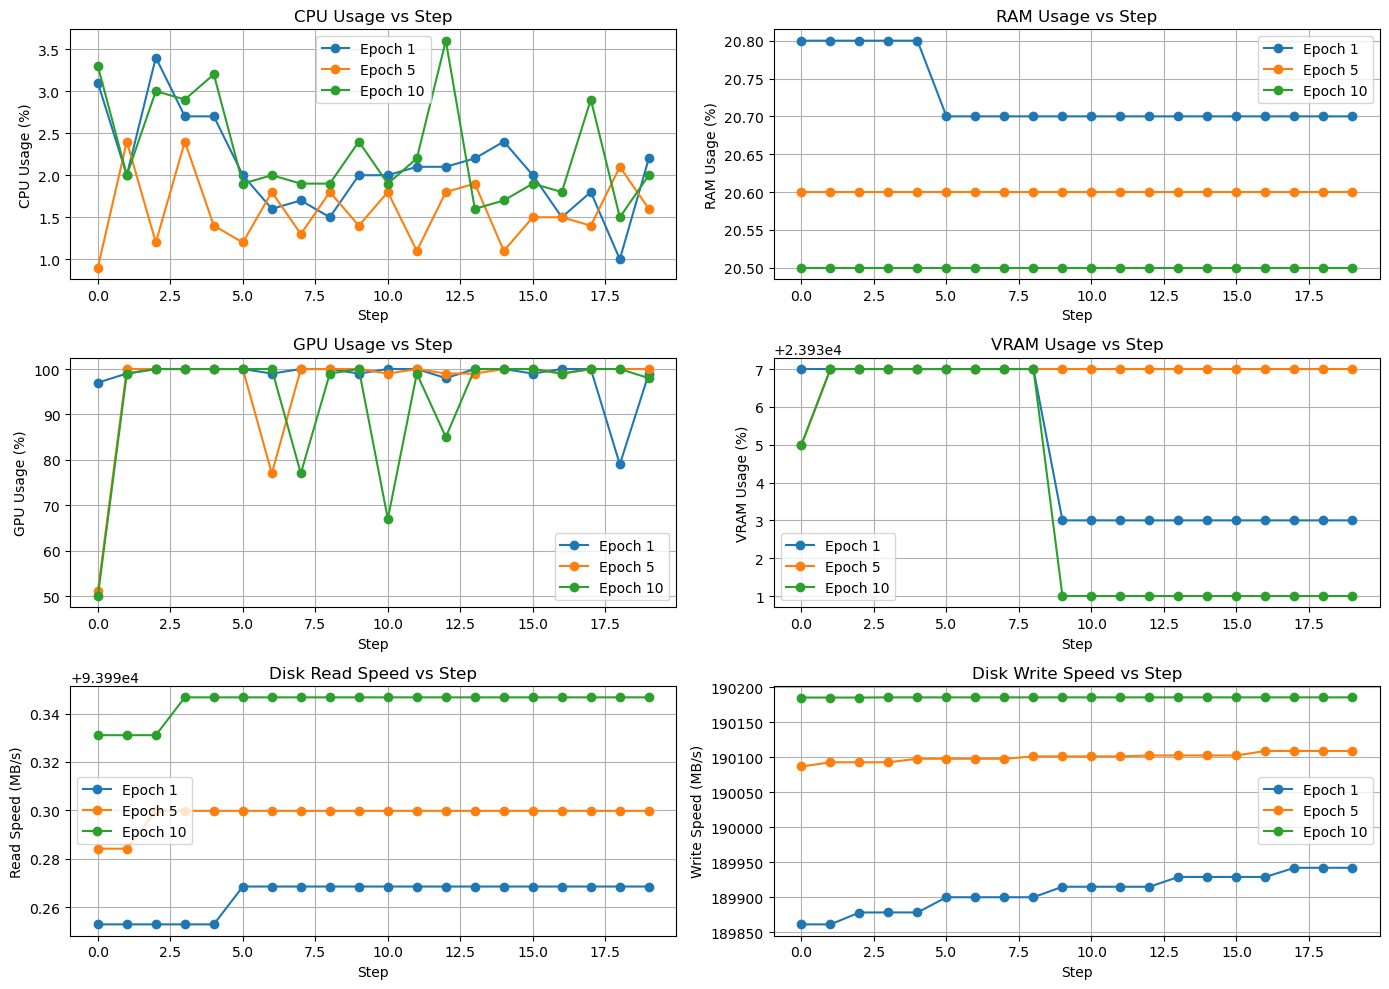

In [35]:
import os
import json
import matplotlib.pyplot as plt

# Directory containing the log files (update this path as needed)
log_dir = r'C:\Users\User\Documents\GitHub\L4S-LLM\Log Viz\test_log_data3'

# Read all the custom_logs_epoch_test_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_test_') and f.endswith('.json')]
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Initialize lists for storing metrics
selected_epochs = [1, 5,10]  # Add more as needed
metrics = {
    'steps': [],
    'cpu_usages': {},
    'ram_usages': {},
    'gpu_usages': {},
    'vram_usages': {},
    'disk_read_speeds': {},
    'disk_write_speeds': {}
}

# Loop through the log files to extract metrics for selected epochs
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    print(epoch_number)
    
    if epoch_number in selected_epochs:
        with open(os.path.join(log_dir, log_file), 'r') as file:
            data = json.load(file)
            steps = [step['step'] for step in data['steps']]
            cpu_usages = [step['CPU Usage'] for step in data['steps']]
            ram_usages = [step['RAM Usage'] for step in data['steps']]
            gpu_usages = [step['GPU Usage'] for step in data['steps']]
            vram_usages = [step['VRAM Usage'] for step in data['steps']]
            disk_read_speeds = [step['Disk Read Speed (MB/s)'] for step in data['steps']]
            disk_write_speeds = [step['Disk Write Speed (MB/s)'] for step in data['steps']]

            # Store metrics by epoch number
            metrics['steps'] = steps  # Assuming steps are the same for each selected epoch
            metrics['cpu_usages'][epoch_number] = cpu_usages
            metrics['ram_usages'][epoch_number] = ram_usages
            metrics['gpu_usages'][epoch_number] = gpu_usages
            metrics['vram_usages'][epoch_number] = vram_usages
            metrics['disk_read_speeds'][epoch_number] = disk_read_speeds
            metrics['disk_write_speeds'][epoch_number] = disk_write_speeds

# Plotting
plt.figure(figsize=(14, 10))

# Plot CPU Usage
plt.subplot(3, 2, 1)
for epoch in selected_epochs:
    plt.plot(metrics['steps'], metrics['cpu_usages'][epoch], label=f'Epoch {epoch}', marker='o')
plt.title('CPU Usage vs Step')
plt.xlabel('Step')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.grid()

# Plot RAM Usage
plt.subplot(3, 2, 2)
for epoch in selected_epochs:
    plt.plot(metrics['steps'], metrics['ram_usages'][epoch], label=f'Epoch {epoch}', marker='o')
plt.title('RAM Usage vs Step')
plt.xlabel('Step')
plt.ylabel('RAM Usage (%)')
plt.legend()
plt.grid()

# Plot GPU Usage
plt.subplot(3, 2, 3)
for epoch in selected_epochs:
    plt.plot(metrics['steps'], metrics['gpu_usages'][epoch], label=f'Epoch {epoch}', marker='o')
plt.title('GPU Usage vs Step')
plt.xlabel('Step')
plt.ylabel('GPU Usage (%)')
plt.legend()
plt.grid()

# Plot VRAM Usage
plt.subplot(3, 2, 4)
for epoch in selected_epochs:
    plt.plot(metrics['steps'], metrics['vram_usages'][epoch], label=f'Epoch {epoch}', marker='o')
plt.title('VRAM Usage vs Step')
plt.xlabel('Step')
plt.ylabel('VRAM Usage (%)')
plt.legend()
plt.grid()

# Plot Disk Read Speed
plt.subplot(3, 2, 5)
for epoch in selected_epochs:
    plt.plot(metrics['steps'], metrics['disk_read_speeds'][epoch], label=f'Epoch {epoch}', marker='o')
plt.title('Disk Read Speed vs Step')
plt.xlabel('Step')
plt.ylabel('Read Speed (MB/s)')
plt.legend()
plt.grid()

# Plot Disk Write Speed
plt.subplot(3, 2, 6)
for epoch in selected_epochs:
    plt.plot(metrics['steps'], metrics['disk_write_speeds'][epoch], label=f'Epoch {epoch}', marker='o')
plt.title('Disk Write Speed vs Step')
plt.xlabel('Step')
plt.ylabel('Write Speed (MB/s)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


### Plot Returns for each epoch

In [36]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming you've already imported required libraries and set up your data as before

# # Read and extract returns for each epoch
# epoch_returns = {}

# # Loop through each log file and extract returns along with the epoch
# for log_file in log_files:
#     epoch_number = int(log_file.split('_')[-1].split('.')[0])
    
#     with open(os.path.join(log_dir, log_file), 'r') as file:
#         data = json.load(file)
        
#         returns = np.array([step['returns'] for step in data['steps']])
#         # Reshape returns if necessary
#         returns = returns.flatten()

#         # print(np.mean(returns))
        
#         # Store returns for the current epoch
#         epoch_returns[epoch_number] = returns

# # Plot returns vs steps for each epoch in separate graphs
# for epoch_number, returns in epoch_returns.items():
#     plt.figure(figsize=(10, 5))
#     steps = np.arange(len(returns))  # Create an array for step numbers
#     plt.plot(steps, returns, marker='o', label=f'Epoch {epoch_number}')
    
#     plt.title(f'Returns vs Steps for Epoch {epoch_number}')
#     plt.xlabel('Step Number')
#     plt.ylabel('Returns')
#     plt.grid(True)
#     plt.legend()
    
#     # Show each plot
#     plt.show()

# # Set the figure size
# plt.figure(figsize=(12, 6))

# # Plot Mean Return
# plt.subplot(1, 2, 1)
# plt.plot(df['Epoch'], df['Mean Return'], marker='o', color='blue', label=label_name+'Mean Return')
# plt.title('Mean Return vs Epoch Number')
# plt.xlabel('Epoch Number')
# plt.ylabel('Mean Return')
# plt.grid(True)
# plt.legend()

# # Plot Median Return
# plt.subplot(1, 2, 2)
# plt.plot(df['Epoch'], df['Median Return'], marker='o', color='orange', label=label_name+'Median Return')
# plt.title('Median Return vs Epoch Number')
# plt.xlabel('Epoch Number')
# plt.ylabel('Median Return')
# plt.grid(True)
# plt.legend()

# # Show the plots
# plt.tight_layout()
# plt.show()


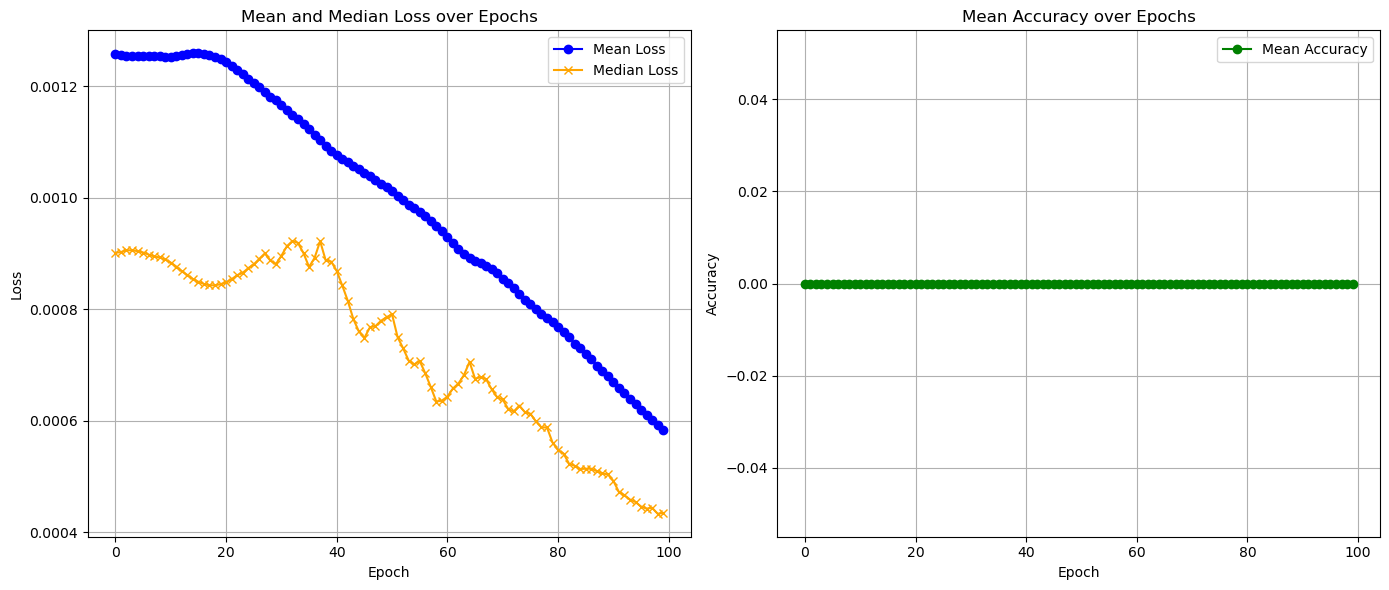

In [12]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the function to convert actions to classes
def convert_to_classes(action):
    """
    Placeholder function to convert action values into classes.
    Replace this logic with the actual implementation based on your use case.
    """
    return int(round(action))

# Directory containing the log files (update this path as needed)
log_dir = r'C:\Users\User\Documents\ADR\Viz Testing\test_log_data'

# Initialize lists to store the data
epoch_numbers = []
mean_losses = []
median_losses = []
mean_accuracies = []

# Read all the custom_logs_epoch_test_*.json files
log_files = [f for f in os.listdir(log_dir) if f.startswith('custom_logs_epoch_test_') and f.endswith('.json')]

# Sort the log files based on the epoch number
log_files.sort(key=lambda x: int(x.split('_')[-1].split('.')[0]))

# Loop through each log file and extract mean and median losses, and accuracies
for log_file in log_files:
    epoch_number = int(log_file.split('_')[-1].split('.')[0])
    epoch_numbers.append(epoch_number)

    with open(os.path.join(log_dir, log_file), 'r') as file:
        data = json.load(file)
        
        losses = [step['test_loss'] for step in data['steps']]
        actions_preds = [step['actions_pred'] for step in data['steps']]  # Ensure this key exists in your logs
        actions = [step['actions'] for step in data['steps']]  # Ground truth actions
        
        # Calculate mean and median losses
        mean_loss = sum(losses) / len(losses)
        median_loss = pd.Series(losses).median()
        
        mean_losses.append(mean_loss)
        median_losses.append(median_loss)

        # Calculate accuracy
        accuracies = []
        for preds, true_actions in zip(actions_preds, actions):
            preds_array = np.array(preds)  # Shape: (1, 3, 20)
            true_actions_array = np.array(true_actions)  # Shape: (1, 20, 1)

            # Convert true actions to classes
            true_actions_classes = np.vectorize(convert_to_classes)(true_actions_array.flatten())  # Shape: (20,)

            # Get the index of the maximum predicted value
            preds_indices = preds_array.argmax(axis=1).flatten()  # Shape: (20,)

            # Calculate accuracy
            accuracy = (preds_indices == true_actions_classes).mean()
            accuracies.append(accuracy)

        mean_accuracy = np.mean(accuracies) if accuracies else None
        mean_accuracies.append(mean_accuracy)

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Epoch': epoch_numbers,
    'Mean Loss': mean_losses,
    'Median Loss': median_losses,
    'Mean Accuracy': mean_accuracies
})

# Plotting
plt.figure(figsize=(14, 6))

# Plot Mean Loss
plt.subplot(1, 2, 1)
plt.plot(df['Epoch'], df['Mean Loss'], marker='o', label='Mean Loss', color='blue')
plt.plot(df['Epoch'], df['Median Loss'], marker='x', label='Median Loss', color='orange')
plt.title('Mean and Median Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Mean Accuracy
plt.subplot(1, 2, 2)
plt.plot(df['Epoch'], df['Mean Accuracy'], marker='o', label='Mean Accuracy', color='green')
plt.title('Mean Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


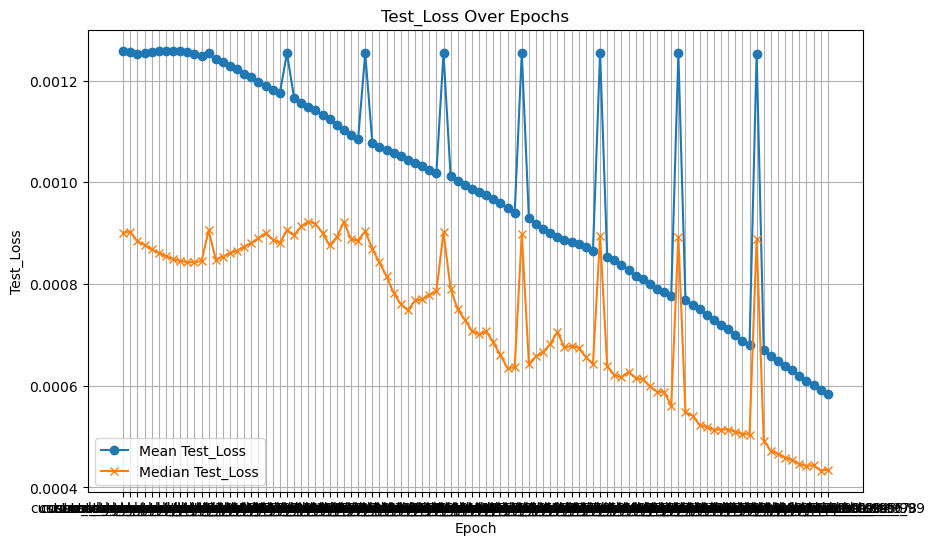

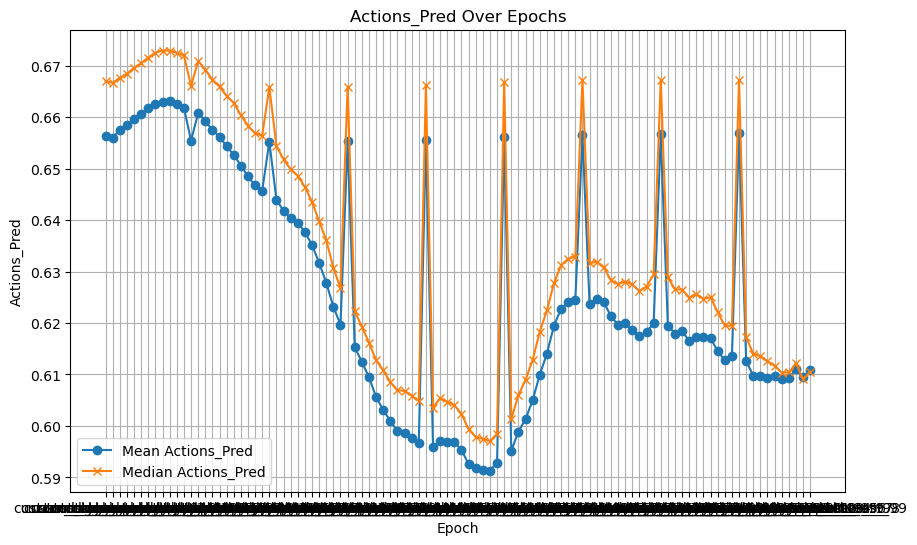

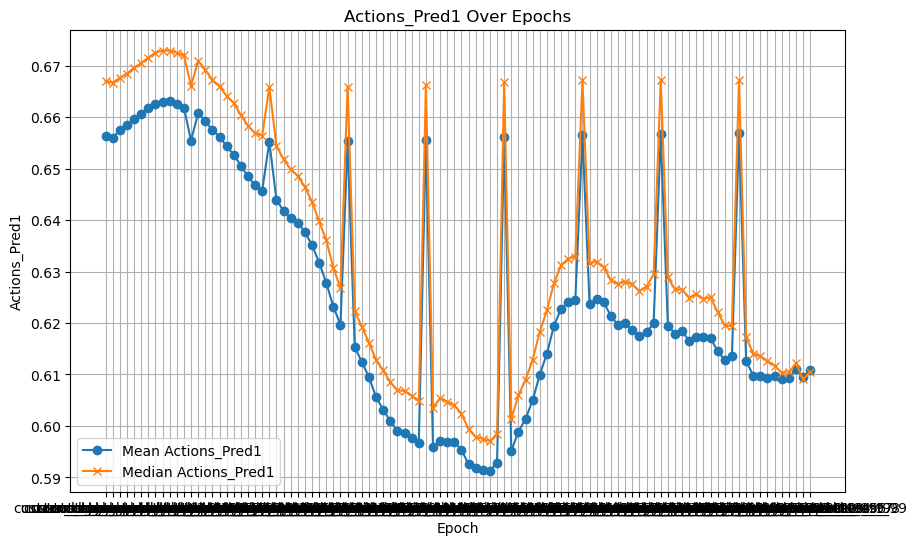

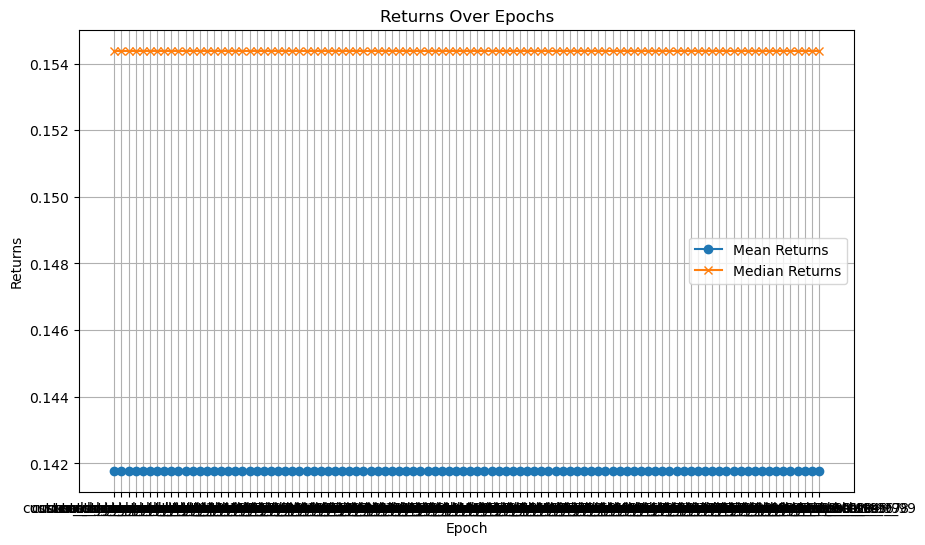

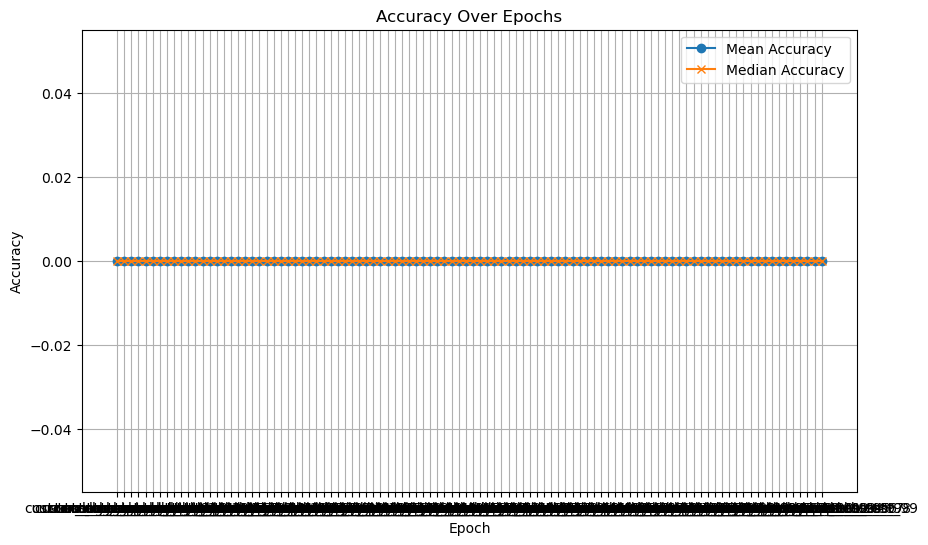

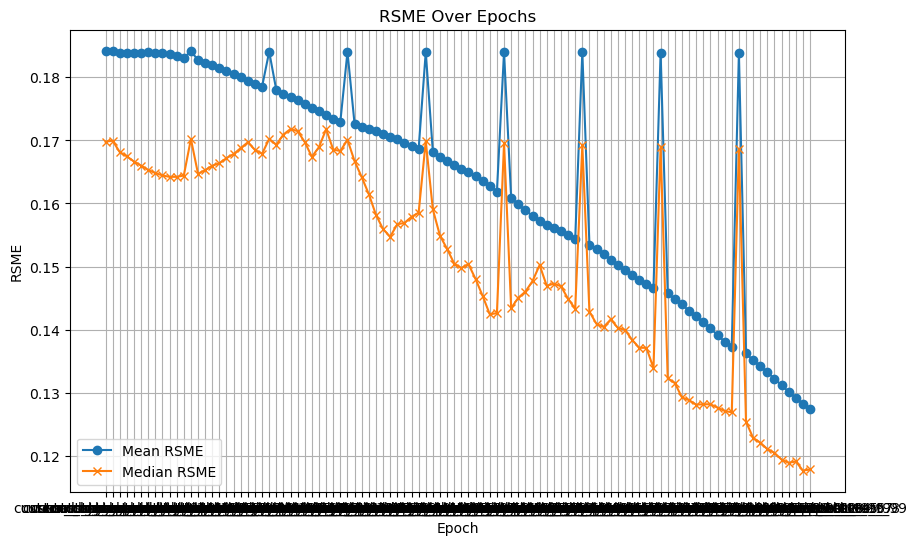

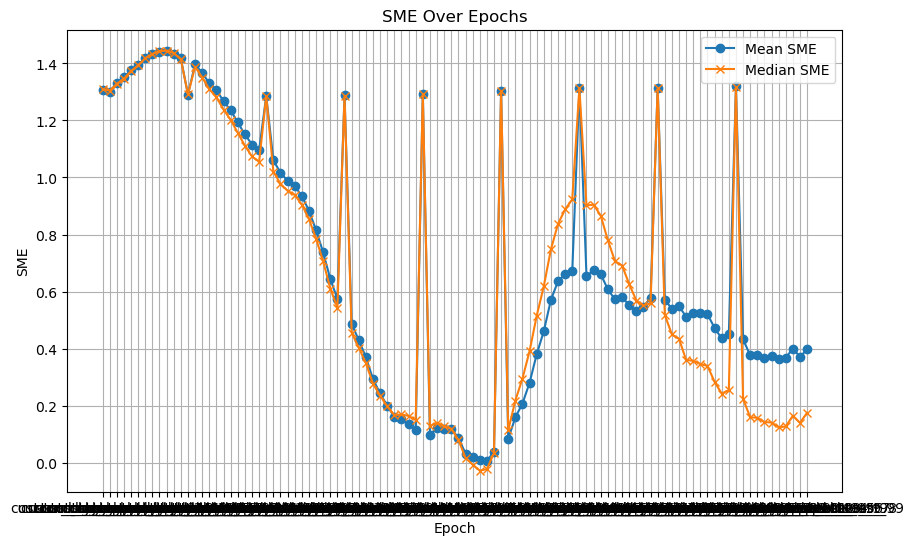

In [9]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"


# Initialize list to store epoch data
epoch_data = []

# Process each JSON file
for file in os.listdir(folder_path):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize metrics dictionary to store values for each file
        metrics = {'test_loss': [], 'actions_pred': [], 'actions_pred1': [], 'returns': [], 'accuracy': [], 'rsme': [], 'sme': []}
        
        # Extract data from each step (assuming each step contains the mentioned metrics)
        for step in data['steps']:  # Assuming 'steps' contains the 30 steps in one epoch
            # Collect the metrics
            metrics['test_loss'].append(step['test_loss'])
            metrics['actions_pred'].append(step['actions_pred'])
            metrics['actions_pred1'].append(step['actions_pred1'])
            metrics['returns'].append(step['returns'])
            
            # Calculate accuracy: Compare actions_pred and labels
            if 'actions_pred' in step and 'labels' in step:
                accuracy = np.mean(np.array(step['actions_pred']) == np.array(step['labels']))  # Compare predicted actions and labels
                metrics['accuracy'].append(accuracy)
            
            # Calculate RSME and SME: Compare actions_pred and labels
            if 'actions_pred' in step and 'labels' in step:
                actions_pred = np.array(step['actions_pred'])
                labels = np.array(step['labels'])

                # Calculate RSME (Root Mean Squared Error)
                rsme = np.sqrt(np.mean((actions_pred - labels) ** 2))
                metrics['rsme'].append(rsme)

                # Calculate SME (Sum of Mean Errors)
                sme = np.sum(actions_pred - labels)
                metrics['sme'].append(sme)

        # Compute mean and median for each metric over the steps in this file (representing one epoch)
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_Test_Loss': np.mean(metrics['test_loss']),
            'Median_Test_Loss': np.median(metrics['test_loss']),
            'Mean_Actions_Pred': np.mean(metrics['actions_pred']),
            'Median_Actions_Pred': np.median(metrics['actions_pred']),
            'Mean_Actions_Pred1': np.mean(metrics['actions_pred1']),
            'Median_Actions_Pred1': np.median(metrics['actions_pred1']),
            'Mean_Returns': np.mean(metrics['returns']),
            'Median_Returns': np.median(metrics['returns']),
            'Mean_Accuracy': np.mean(metrics['accuracy']),
            'Median_Accuracy': np.median(metrics['accuracy']),
            'Mean_RSME': np.mean(metrics['rsme']),
            'Median_RSME': np.median(metrics['rsme']),
            'Mean_SME': np.mean(metrics['sme']),
            'Median_SME': np.median(metrics['sme'])
        }
        epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
csv_file = "epoch_summary.csv"
df = pd.DataFrame(epoch_data)
df.to_csv(csv_file, index=False)

# Plotting the metrics
metrics_to_plot = ['Test_Loss', 'Actions_Pred', 'Actions_Pred1', 'Returns', 'Accuracy', 'RSME', 'SME']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epoch'], df[f'Mean_{metric}'], label=f'Mean {metric}', marker='o')
    plt.plot(df['Epoch'], df[f'Median_{metric}'], label=f'Median {metric}', marker='x')
    plt.title(f'{metric} Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.savefig(f'{metric.lower()}_plot.png')  # Save the plot as PNG
    plt.show()


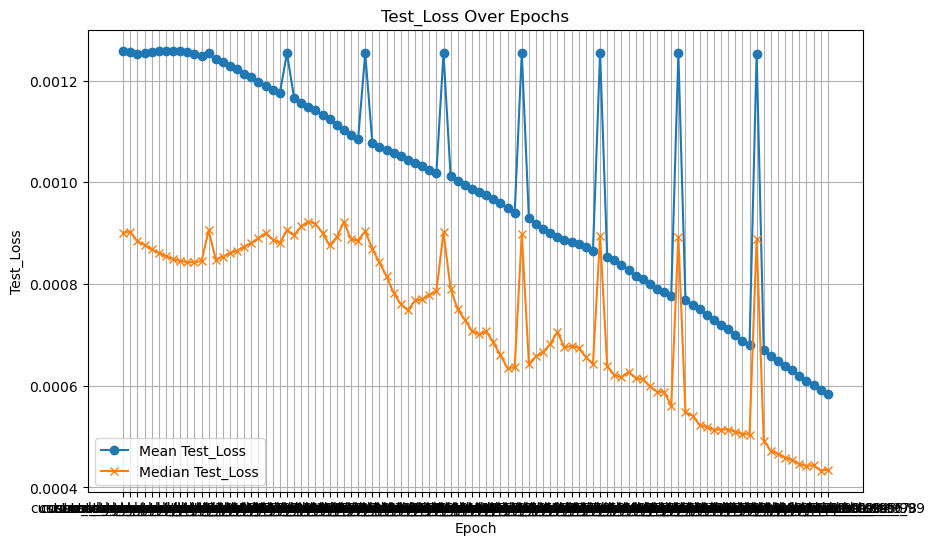

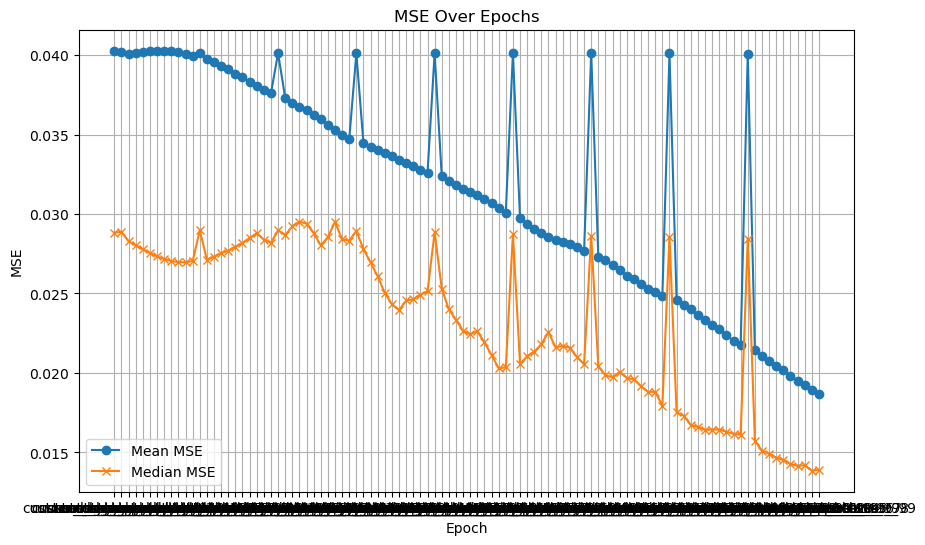

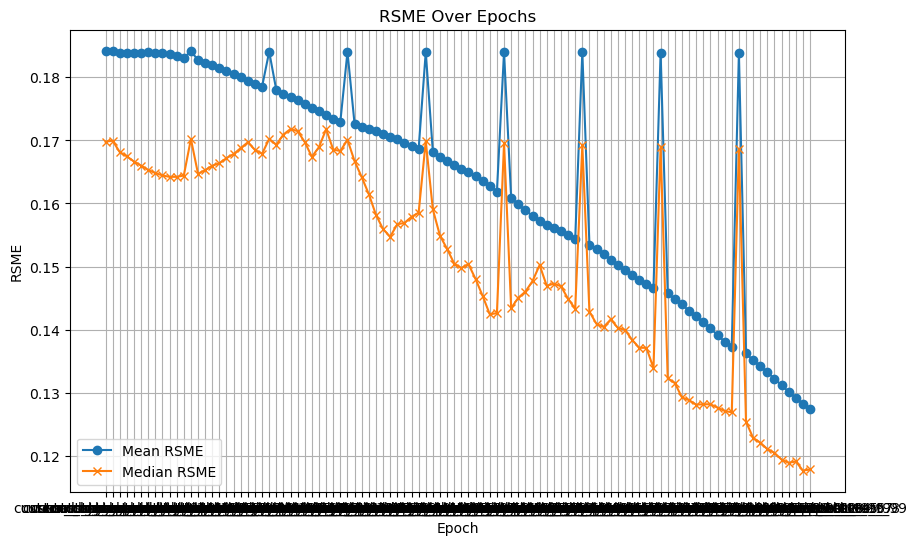

Epoch summary saved to: C:\Users\User\Documents\ADR\Viz Testing\test_log_data\epoch_summary.csv
Plots saved to the same directory: C:\Users\User\Documents\ADR\Viz Testing\test_log_data


In [18]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store epoch data
epoch_data = []

# Process each JSON file
for file in sorted(os.listdir(folder_path)):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize metrics lists
        test_losses = []
        rmses = []
        mses = []

        # Extract data for each step
        for step in data['steps']:
            test_loss = step.get('test_loss', 0)
            predictions = np.array(step.get('actions_pred', [0]))
            labels = np.array(step.get('labels', [0]))

            # Calculate metrics
            mse = np.mean((predictions - labels) ** 2)
            rmse = np.sqrt(mse)

            # Append to lists
            test_losses.append(test_loss)
            mses.append(mse)
            rmses.append(rmse)

        # Compute mean and median for the epoch
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_Test_Loss': np.mean(test_losses),
            'Median_Test_Loss': np.median(test_losses),
            'Mean_MSE': np.mean(mses),
            'Median_MSE': np.median(mses),
            'Mean_RSME': np.mean(rmses),
            'Median_RSME': np.median(rmses),
        }
        epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
df = pd.DataFrame(epoch_data)
csv_file = os.path.join(folder_path, "epoch_summary.csv")
df.to_csv(csv_file, index=False)

# Plotting the metrics
metrics_to_plot = ['Test_Loss', 'MSE', 'RSME']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(df['Epoch'], df[f'Mean_{metric}'], label=f'Mean {metric}', marker='o')
    plt.plot(df['Epoch'], df[f'Median_{metric}'], label=f'Median {metric}', marker='x')
    plt.title(f'{metric} Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plot_file = os.path.join(folder_path, f'{metric.lower()}_plot.png')
    plt.savefig(plot_file)  # Save the plot as PNG
    plt.show()

print(f"Epoch summary saved to: {csv_file}")
print(f"Plots saved to the same directory: {folder_path}")


C:\Users\User\AppData\Local\Temp\ipykernel_16848\1129424037.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['Mean_RSME'], vert=False, patch_artist=True, labels=['RSME'])


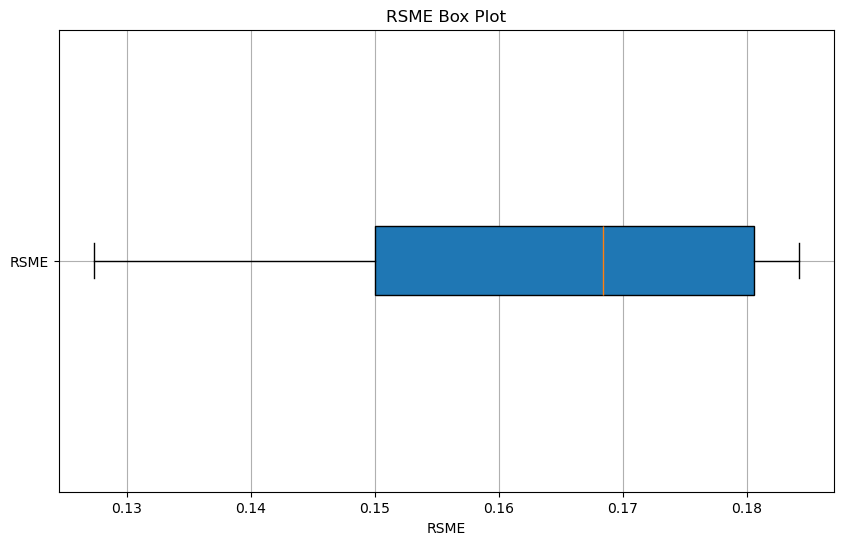

C:\Users\User\AppData\Local\Temp\ipykernel_16848\1129424037.py:85: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['Mean_SME'], vert=False, patch_artist=True, labels=['SME'])


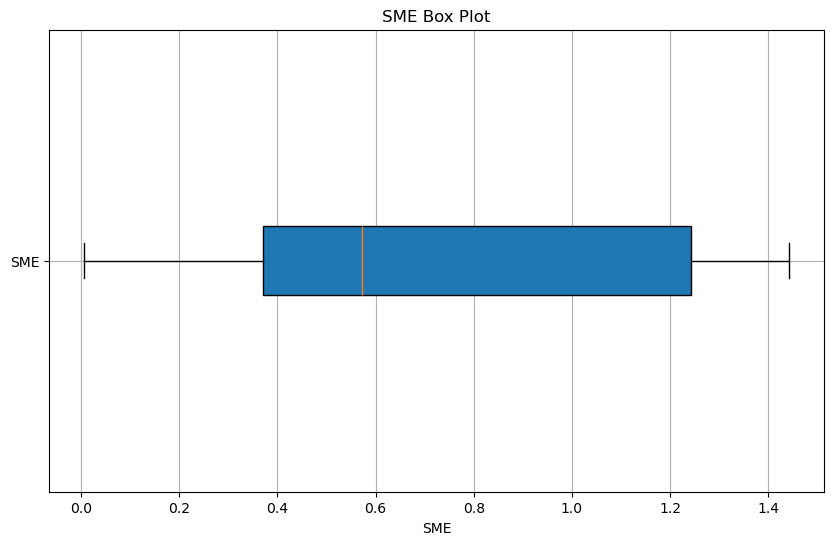

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store epoch data
epoch_data = []

# Process each JSON file
for file in os.listdir(folder_path):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize metrics dictionary to store values for each file
        metrics = {'test_loss': [], 'actions_pred': [], 'actions_pred1': [], 'returns': [], 'accuracy': [], 'rsme': [], 'sme': []}
        
        # Extract data from each step (assuming each step contains the mentioned metrics)
        for step in data['steps']:  # Assuming 'steps' contains the 30 steps in one epoch
            # Collect the metrics
            metrics['test_loss'].append(step['test_loss'])
            metrics['actions_pred'].append(step['actions_pred'])
            metrics['actions_pred1'].append(step['actions_pred1'])
            metrics['returns'].append(step['returns'])
            
            # Calculate accuracy: Compare actions_pred and labels
            if 'actions_pred' in step and 'labels' in step:
                accuracy = np.mean(np.array(step['actions_pred']) == np.array(step['labels']))  # Compare predicted actions and labels
                metrics['accuracy'].append(accuracy)
            
            # Calculate RSME and SME: Compare actions_pred and labels
            if 'actions_pred' in step and 'labels' in step:
                actions_pred = np.array(step['actions_pred'])
                labels = np.array(step['labels'])

                # Calculate RSME (Root Mean Squared Error)
                rsme = np.sqrt(np.mean((actions_pred - labels) ** 2))
                metrics['rsme'].append(rsme)

                # Calculate SME (Sum of Mean Errors)
                sme = np.sum(actions_pred - labels)
                metrics['sme'].append(sme)

        # Compute mean and median for each metric over the steps in this file (representing one epoch)
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_Test_Loss': np.mean(metrics['test_loss']),
            'Median_Test_Loss': np.median(metrics['test_loss']),
            'Mean_Actions_Pred': np.mean(metrics['actions_pred']),
            'Median_Actions_Pred': np.median(metrics['actions_pred']),
            'Mean_Actions_Pred1': np.mean(metrics['actions_pred1']),
            'Median_Actions_Pred1': np.median(metrics['actions_pred1']),
            'Mean_Returns': np.mean(metrics['returns']),
            'Median_Returns': np.median(metrics['returns']),
            'Mean_Accuracy': np.mean(metrics['accuracy']),
            'Median_Accuracy': np.median(metrics['accuracy']),
            'Mean_RSME': np.mean(metrics['rsme']),
            'Median_RSME': np.median(metrics['rsme']),
            'Mean_SME': np.mean(metrics['sme']),
            'Median_SME': np.median(metrics['sme'])
        }
        epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
csv_file = "epoch_summary.csv"
df = pd.DataFrame(epoch_data)
df.to_csv(csv_file, index=False)

# Box plot for RSME
plt.figure(figsize=(10, 6))
plt.boxplot(df['Mean_RSME'], vert=False, patch_artist=True, labels=['RSME'])
plt.title('RSME Box Plot')
plt.xlabel('RSME')
plt.grid(True)
plt.savefig('rsme_boxplot.png')  # Save the RSME box plot
plt.show()

# Box plot for SME
plt.figure(figsize=(10, 6))
plt.boxplot(df['Mean_SME'], vert=False, patch_artist=True, labels=['SME'])
plt.title('SME Box Plot')
plt.xlabel('SME')
plt.grid(True)
plt.savefig('sme_boxplot.png')  # Save the SME box plot
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_16848\221645315.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['Mean_RSME'], df['Mean_SME']], vert=True, patch_artist=True, labels=['Mean RSME', 'Mean SME'])


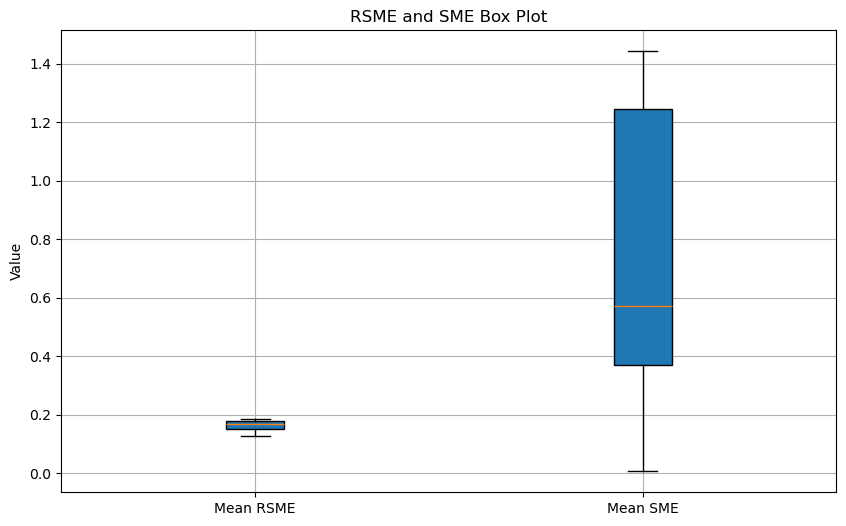

In [2]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store epoch data
epoch_data = []

# Process each JSON file
for file in os.listdir(folder_path):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize metrics dictionary to store values for each file
        metrics = {'test_loss': [], 'actions_pred': [], 'actions_pred1': [], 'returns': [], 'accuracy': [], 'rsme': [], 'sme': []}
        
        # Extract data from each step (assuming each step contains the mentioned metrics)
        for step in data['steps']:  # Assuming 'steps' contains the 30 steps in one epoch
            # Collect the metrics
            metrics['test_loss'].append(step['test_loss'])
            metrics['actions_pred'].append(step['actions_pred'])
            metrics['actions_pred1'].append(step['actions_pred1'])
            metrics['returns'].append(step['returns'])
            
            # Calculate accuracy: Compare actions_pred and labels
            if 'actions_pred' in step and 'labels' in step:
                accuracy = np.mean(np.array(step['actions_pred']) == np.array(step['labels']))  # Compare predicted actions and labels
                metrics['accuracy'].append(accuracy)
            
            # Calculate RSME and SME: Compare actions_pred and labels
            if 'actions_pred' in step and 'labels' in step:
                actions_pred = np.array(step['actions_pred'])
                labels = np.array(step['labels'])

                # Calculate RSME (Root Mean Squared Error)
                rsme = np.sqrt(np.mean((actions_pred - labels) ** 2))
                metrics['rsme'].append(rsme)

                # Calculate SME (Sum of Mean Errors)
                sme = np.sum(actions_pred - labels)
                metrics['sme'].append(sme)

        # Compute mean and median for each metric over the steps in this file (representing one epoch)
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_RSME': np.mean(metrics['rsme']),
            'Median_RSME': np.median(metrics['rsme']),
            'Mean_SME': np.mean(metrics['sme']),
            'Median_SME': np.median(metrics['sme'])
        }
        epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
csv_file = "epoch_summary.csv"
df = pd.DataFrame(epoch_data)
df.to_csv(csv_file, index=False)

# Plotting the RSME and SME as box plots vertically
plt.figure(figsize=(10, 6))

# Combine the RSME and SME data for vertical box plot
plt.boxplot([df['Mean_RSME'], df['Mean_SME']], vert=True, patch_artist=True, labels=['Mean RSME', 'Mean SME'])

# Add titles and labels
plt.title('RSME and SME Box Plot')
plt.ylabel('Value')
plt.grid(True)

# Save and show the plot
plt.savefig('rsme_sme_boxplot.png')  # Save the plot as PNG
plt.show()


In [16]:
import os
import json
import pandas as pd
import numpy as np

# Directory containing JSON files
log_data_dir = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"  # Replace with the directory containing your JSON files

# Initialize lists to store metrics for each epoch
epochs = []
test_losses = []
mses = []
rmses = []

# Function to compute metrics
def compute_metrics(predictions, labels):
    predictions = np.array(predictions)
    labels = np.array(labels)
    mse = np.mean((predictions - labels) ** 2)
    rmse = np.sqrt(mse)
    return mse, rmse

# Iterate through all JSON files
for i in range(100):  # Assuming files are named from 0 to 99
    file_path = os.path.join(log_data_dir, f'custom_logs_epoch_test_{i}.json')
    with open(file_path, 'r') as f:
        log_data = json.load(f)
    
    for step in log_data['steps']:
        epoch = step['step']
        test_loss = step['test_loss']
        predictions = step['actions_pred'][0]
        labels = step['labels'][0]
        
        mse, rmse = compute_metrics(predictions, labels)
        
        # Append metrics to lists
        epochs.append(epoch)
        test_losses.append(test_loss)
        mses.append(mse)
        rmses.append(rmse)

# Convert lists to a DataFrame
metrics_df = pd.DataFrame({
    'Epoch': epochs,
    'Test Loss': test_losses,
    'MSE': mses,
    'RMSE': rmses
})

# Compute mean and median
metrics_summary = {
    'Metric': ['Test Loss', 'MSE', 'RMSE'],
    'Mean': [metrics_df['Test Loss'].mean(), metrics_df['MSE'].mean(), metrics_df['RMSE'].mean()],
    'Median': [metrics_df['Test Loss'].median(), metrics_df['MSE'].median(), metrics_df['RMSE'].median()]
}
summary_df = pd.DataFrame(metrics_summary)

# Save metrics and summary to CSV in the same directory
metrics_csv_path = os.path.join(log_data_dir, 'epoch_metrics.csv')
summary_csv_path = os.path.join(log_data_dir, 'metrics_summary.csv')

metrics_df.to_csv(metrics_csv_path, index=False)
summary_df.to_csv(summary_csv_path, index=False)

print(f"Detailed metrics saved to: {metrics_csv_path}")
print(f"Summary saved to: {summary_csv_path}")


Detailed metrics saved to: C:\Users\User\Documents\ADR\Viz Testing\test_log_data\epoch_metrics.csv
Summary saved to: C:\Users\User\Documents\ADR\Viz Testing\test_log_data\metrics_summary.csv


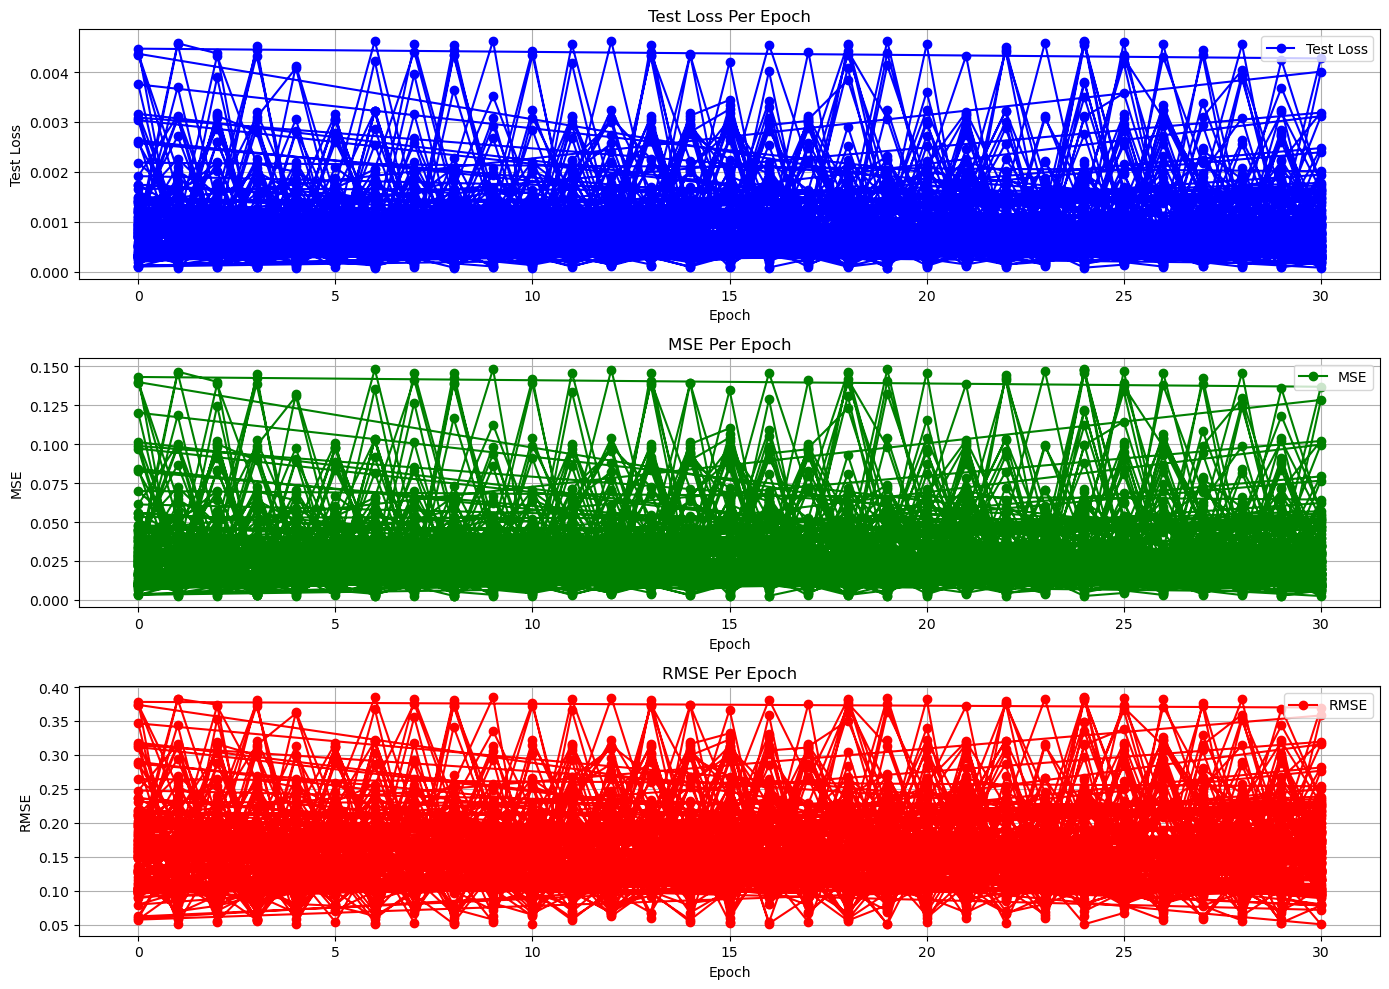

Metrics plot saved to: C:\Users\User\Documents\ADR\Viz Testing\test_log_data\metrics_plot.png


In [17]:
import matplotlib.pyplot as plt

# Plot Test Loss, MSE, and RMSE
plt.figure(figsize=(14, 10))

# Plot Test Loss
plt.subplot(3, 1, 1)
plt.plot(metrics_df['Epoch'], metrics_df['Test Loss'], label='Test Loss', color='blue', marker='o')
plt.title('Test Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Test Loss')
plt.legend()
plt.grid()

# Plot MSE
plt.subplot(3, 1, 2)
plt.plot(metrics_df['Epoch'], metrics_df['MSE'], label='MSE', color='green', marker='o')
plt.title('MSE Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid()

# Plot RMSE
plt.subplot(3, 1, 3)
plt.plot(metrics_df['Epoch'], metrics_df['RMSE'], label='RMSE', color='red', marker='o')
plt.title('RMSE Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

# Adjust layout and save the plot
plt.tight_layout()
plot_path = os.path.join(log_data_dir, 'metrics_plot.png')
plt.savefig(plot_path)
plt.show()

print(f"Metrics plot saved to: {plot_path}")


In [8]:
import os
import json
import pandas as pd
import numpy as np

# Define the folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize a list to store the average sending rate for each epoch
epoch_sending_rates = []

# Loop through all JSON files with the naming pattern
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"  # JSON file name pattern
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract the highest action (sending rate) for each step
        sending_rates = []
        for step in data['steps']:
            if 'actions_pred' in step:
                # Find the highest action value in this step
                max_action = max(step['actions_pred'])
                sending_rates.append(max_action)
        
        # Calculate the average sending rate for this epoch
        if sending_rates:
            average_sending_rate = np.mean(sending_rates)
        else:
            average_sending_rate = 0  # Handle cases with no valid data
        
        # Append the epoch and its average sending rate to the list
        epoch_sending_rates.append({'Epoch': epoch, 'Average_Sending_Rate': average_sending_rate})
    else:
        print(f"File {file_name} not found. Skipping.")

# Save the average sending rates to a CSV file
csv_file = "average_sending_rates.csv"
df = pd.DataFrame(epoch_sending_rates)
df.to_csv(csv_file, index=False)

print(f"Average sending rates saved to {csv_file}.")


Average sending rates saved to average_sending_rates.csv.


In [12]:
import os
import json
import pandas as pd
import numpy as np

# Define the folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize a list to store the average sending rate for each epoch
epoch_sending_rates = []

# Loop through all JSON files with the naming pattern
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"  # JSON file name pattern
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Extract the highest action (sending rate) for each step using list comprehension
        sending_rates = [
            max(step['actions_pred']) for step in data['steps'] if 'actions_pred' in step
        ]
        
        # Calculate the average sending rate for this epoch
        average_sending_rate = np.mean(sending_rates) if sending_rates else 0
        
        # Append the epoch and its average sending rate to the list
        epoch_sending_rates.append({'Epoch': epoch, 'Average_Sending_Rate': average_sending_rate})
    else:
        print(f"File {file_name} not found. Skipping.")

# Save the average sending rates to a CSV file
csv_file = "average_sending_rates.csv"
df = pd.DataFrame(epoch_sending_rates)
df.to_csv(csv_file, index=False)

print(f"Average sending rates saved to {csv_file}.")


Average sending rates saved to average_sending_rates.csv.


31
asdasd
[[[0.8810052275657654, 0.7972200512886047, 0.6845951676368713, 0.7655088901519775, 0.727170467376709, 0.8350753784179688, 0.5974396467208862, 0.7413244247436523, 0.7188522815704346, 0.7267048358917236, 0.7170588374137878, 0.722769021987915, 0.7238266468048096, 0.661462664604187, 0.6507581472396851, 0.6155451536178589, 0.6001715660095215, 0.6227977275848389, 0.7909126281738281, 0.7628010511398315]], [[0.3974086046218872, 0.310535192489624, 0.31671181321144104, 0.4235936403274536, 0.5239824056625366, 0.6101430058479309, 0.5630395412445068, 0.5121934413909912, 0.5955508947372437, 0.5004428029060364, 0.5269398093223572, 0.6635749340057373, 0.6060767769813538, 0.5263075828552246, 0.46215739846229553, 0.5977640151977539, 0.6424870491027832, 0.6415563821792603, 0.7303163409233093, 0.6553736329078674]], [[0.745475709438324, 0.7339990735054016, 0.6253533959388733, 0.665954053401947, 0.7788438200950623, 0.7502360343933105, 0.7048338651657104, 0.7676674723625183, 0.7567175030708313, 0.6

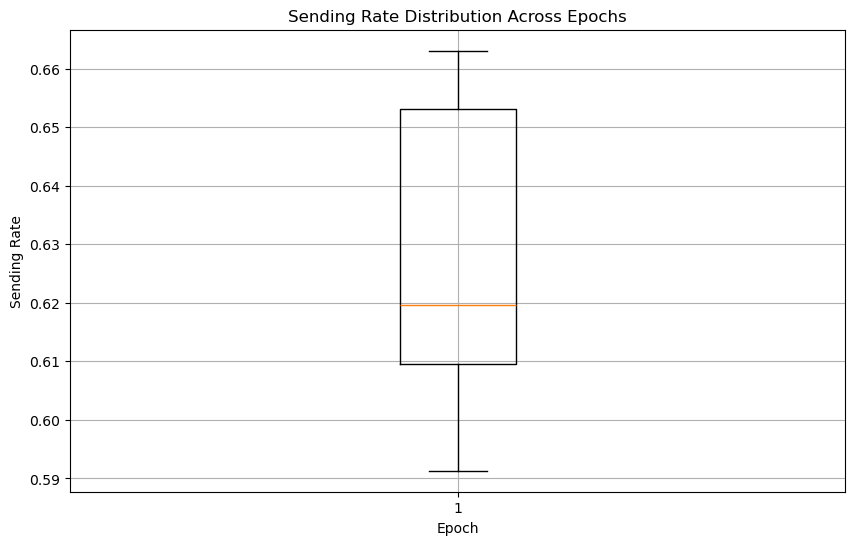

In [27]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize a list to store the sending rates for each epoch
epoch_sending_rates = []

# Maximum actions value
max_actions = 1043241.4533971

# Loop through all JSON files with the naming pattern
for epoch in range(100):  # Assuming 100 epochs, 0 to 99
    file_name = f"custom_logs_epoch_test_{epoch}.json"  # JSON file name pattern
    file_path = os.path.join(folder_path, file_name)
    
    if os.path.exists(file_path):  # Check if the file exists
        with open(file_path, 'r') as f:
            data = json.load(f)
        sending_rates = [
            step['actions_pred'] for step in data['steps'] if 'actions_pred' in step
        ]

        print(len(sending_rates))
        print("asdasd")
        print(sending_rates)
        print(sending_rates[0][0])
        print("asdasd")
        print(len(sending_rates[0]))
        sr_list= []
        for step_log in data['steps']:
            sr_list.append(step_log['actions_pred'][0][0] * max_actions)
        
        # Extract the sending rates for each step by multiplying actions_pred with max_actions
        # sending_rates = [
        #     max(step['actions_pred'][0][0]) * max_actions for step in data['steps'] if 'actions_pred' in step
        # ]
        print("sr",sr_list)
        
        # Calculate the average sending rate for this epoch
        average_sending_rate = np.mean(sr_list) if sending_rates else 0
        
        # Append the epoch and its average sending rate to the list
        epoch_sending_rates.append({'Epoch': epoch, 'Average_Sending_Rate': average_sending_rate})
    else:
        print(f"File {file_name} not found. Skipping.")

# Save the average sending rates to a CSV file
csv_file = "average_sending_rates.csv"
df = pd.DataFrame(epoch_sending_rates)
df.to_csv(csv_file, index=False)

print(f"Average sending rates saved to {csv_file}.")

# Plotting the box plot
plt.figure(figsize=(10, 6))
sending_rate_values = [epoch['Average_Sending_Rate'] for epoch in epoch_sending_rates]
plt.boxplot(sending_rate_values)
plt.title('Sending Rate Distribution Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Sending Rate')
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_24612\1491025327.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([epoch['Mean_Sending_Rate'] for epoch in epoch_data], labels=[epoch['Epoch'] for epoch in epoch_data])


ValueError: Dimensions of labels and X must be compatible

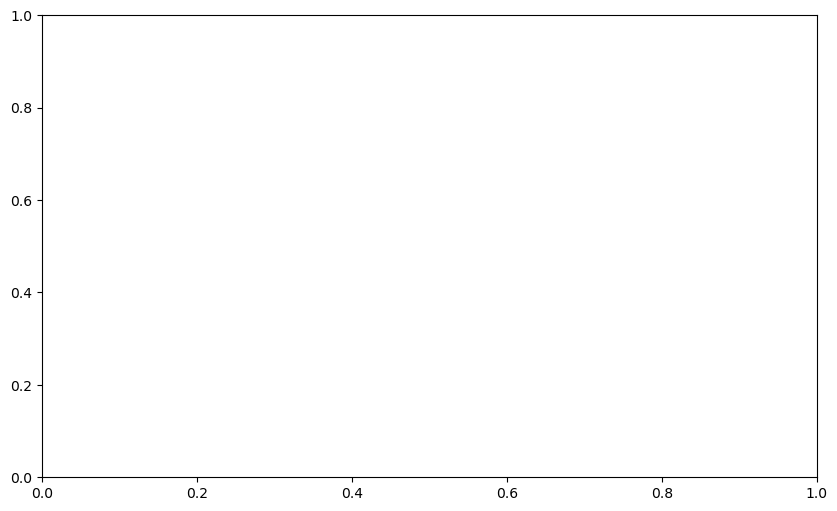

In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define folder containing JSON files
folder_path = "C:\\Users\\User\\Documents\\ADR\\Viz Testing\\test_log_data"

# Initialize list to store epoch data
epoch_data = []

# Maximum actions value
max_actions = 1043241.4533971

# Process each JSON file
for file in sorted(os.listdir(folder_path)):
    if file.endswith(".json"):
        file_path = os.path.join(folder_path, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        # Initialize sending rate list
        sending_rates = []

        # Extract data for each step
        for step in data['steps']:
            actions_pred = np.array(step.get('actions_pred', [0]))

            # Calculate sending rate
            sending_rate = actions_pred * max_actions
            sending_rates.append(sending_rate)

        # Compute mean sending rate for the epoch
        epoch_summary = {
            'Epoch': file.split('.')[0],  # Use file name as epoch identifier
            'Mean_Sending_Rate': np.mean(sending_rates),
            'Median_Sending_Rate': np.median(sending_rates),
        }
        epoch_data.append(epoch_summary)

# Save the collected data to a CSV file
df = pd.DataFrame(epoch_data)
csv_file = os.path.join(folder_path, "sending_rate_summary.csv")
df.to_csv(csv_file, index=False)

# Plotting the box plot for sending rates
plt.figure(figsize=(10, 6))
plt.boxplot([epoch['Mean_Sending_Rate'] for epoch in epoch_data], labels=[epoch['Epoch'] for epoch in epoch_data])
plt.title('Sending Rate Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Sending Rate')
plt.xticks(rotation=90)
plt.grid(True)
box_plot_file = os.path.join(folder_path, 'sending_rate_box_plot.png')
plt.savefig(box_plot_file)  # Save the box plot as PNG
plt.show()

print(f"Sending rate summary saved to: {csv_file}")
print(f"Box plot saved to: {box_plot_file}")
